In [96]:
import pandas as pd
import hddm
from glob import glob
import matplotlib.pyplot as plt
from p_tqdm import p_map
from functools import partial

## 载入数据

In [2]:
data = pd.read_csv('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/filtered_group/sourcedata-eeg_outside-MRT/beh/preprocessed_group.csv')

## 模型1-4

model1: 

v ~ coherency stimulus 

t ~ spatial

In [3]:
def model1(id, data, samples, burn, thin):
    
    print('running model%i'%id)
    
    dbname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_%i.db'%id
    fname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_%i'%id
    
    model = hddm.HDDM(data,
                      depends_on = {'v':['coherency', 'stimulus'],
                                    't':'spatial'},
                      bias = True,
                      include = {'sv'})
    model.find_starting_values()
    model.sample(samples,
                 burn = burn,
                 dbname = dbname,
                 db='pickle',
                 thin = thin)
    model.save(fname)
    
    return model

model2: 

v ~ stimulus  

t ~ spatial

z ~ coherency

In [4]:
def model2(id, data, samples, burn, thin):
    
    print('running model%i'%id)
    
    dbname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_%i.db'%id
    fname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_%i'%id
    
    model = hddm.HDDM(data,
                      depends_on = {'v':'stimulus',
                                    't':'spatial',
                                    'z':'coherency'},
                      bias = True,
                      include = {'sv'})
    model.find_starting_values()
    model.sample(samples,
                 burn = burn,
                 dbname = dbname,
                 db='pickle',
                 thin = thin)
    model.save(fname)
    
    return model

model3: 

v ~ stimulus  

t ~ spatial

a ~ coherency

In [5]:
def model3(id, data, samples, burn, thin):
    
    print('running model%i'%id)
    
    dbname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_%i.db'%id
    fname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_%i'%id
    
    model = hddm.HDDM(data,
                      depends_on = {'v':'stimulus',
                                    't':'spatial',
                                    'a':'coherency'},
                      bias = True,
                      include = {'sv'})
    model.find_starting_values()
    model.sample(samples,
                 burn = burn,
                 dbname = dbname,
                 db='pickle',
                 thin = thin)
    model.save(fname)
    
    return model

model4: 

v ~ stimulus  

t ~ spatial coherency

In [6]:
def model4(id, data, samples, burn, thin):
    
    print('running model%i'%id)
    
    dbname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_%i.db'%id
    fname = '/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_%i'%id
    
    model = hddm.HDDM(data,
                      depends_on = {'v': 'stimulus',
                                    't':['spatial','coherency']},
                      bias = True,
                      include = {'sv'})
    model.find_starting_values()
    model.sample(samples,
                 burn = burn,
                 dbname = dbname,
                 db='pickle',
                 thin = thin)
    model.save(fname)
    
    return model

## 运行模型

In [7]:
chains = 8
samples = 3000
burn = 1000
thin = 1

In [ ]:
models_1 = p_map(partial(model1, 
                         data = data, 
                         samples = samples,
                         burn = burn,
                         thin = thin),
                 range(chains))

running model0


  0%|          | 0/8 [00:00<?, ?it/s]

No model attribute --> setting up standard HDDM
Includes supplied:  {'sv'}
Set model to full_ddm
running model1
No model attribute --> setting up standard HDDM
Includes supplied:  {'sv'}
Set model to full_ddm
running model2
No model attribute --> setting up standard HDDM
Includes supplied:  {'sv'}
running model3Set model to full_ddm
No model attribute --> setting up standard HDDM
Includes supplied: 
 {'sv'}
Set model to full_ddm
running model4
No model attribute --> setting up standard HDDM
running model5Includes supplied: 

 No model attribute --> setting up standard HDDM
Includes supplied: {'sv'} running model6{'sv'}Set model to full_ddm


No model attribute --> setting up standard HDDMSet model to full_ddm

running model7
Includes supplied:  No model attribute --> setting up standard HDDM{'sv'}

Includes supplied: Set model to full_ddm 
{'sv'}
Set model to full_ddm


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-pack

 -----------------90%--------------    ] 2728 of 3000 complete in 1990.4 sec              0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 1.1 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 1.2 sec[                  0%                  ] 3 of 3000 complete in 1.2 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 2 of 3000 complete in 0.6 sec[                  0%                  ] 3 of 3000 complete in 1.4 sec[                  0%                  ] 4 of 3000 complete in 1.9 sec[                  0%                  ] 3 of 3000 complete in 1.4 sec[                  

In [ ]:
models_2 = p_map(partial(model2, 
                         data = data, 
                         samples = samples,
                         burn = burn,
                         thin = thin),
                 range(chains))

In [ ]:
models_3 = p_map(partial(model3, 
                         data = data, 
                         samples = samples,
                         burn = burn,
                         thin = thin),
                 range(chains))

 -----------------45%                  ] 1361 of 3000 complete in 1073.5 sec                 0%                  ] 28 of 3000 complete in 24.2 sec[                  0%                  ] 28 of 3000 complete in 24.7 sec [                  1%                  ] 37 of 3000 complete in 30.0 sec[                  0%                  ] 28 of 3000 complete in 24.8 sec[                  1%                  ] 37 of 3000 complete in 30.5 sec[                  1%                  ] 31 of 3000 complete in 26.2 sec[                  1%                  ] 36 of 3000 complete in 30.6 sec[                  0%                  ] 29 of 3000 complete in 25.2 sec[                  0%                  ] 29 of 3000 complete in 25.5 sec[                  1%                  ] 38 of 3000 complete in 30.8 sec[                  1%                  ] 38 of 3000 complete in 30.8 sec[                  0%                  ] 29 of 3000 complete in 25.5 sec[                  1%                  ] 38 of 3000 complete 

In [ ]:
models_4 = p_map(partial(model4, 
                         data = data, 
                         samples = samples,
                         burn = burn,
                         thin = thin),
                 range(chains))

 -----------------60%--                ] 1814 of 3000 complete in 1488.0 sec------           18%                  ] 551 of 3000 complete in 443.7 sec [-------          18%                  ] 558 of 3000 complete in 437.9 sec[------           18%                  ] 551 of 3000 complete in 444.1 sec[------           18%                  ] 542 of 3000 complete in 444.3 sec[-------          18%                  ] 561 of 3000 complete in 444.5 sec[------           18%                  ] 548 of 3000 complete in 438.0 sec[------           17%                  ] 531 of 3000 complete in 438.4 sec[------           18%                  ] 541 of 3000 complete in 438.2 sec[------           18%                  ] 552 of 3000 complete in 444.7 sec[------           18%                  ] 552 of 3000 complete in 444.8 sec[-------          18%                  ] 559 of 3000 complete in 438.9 sec[------           18%                  ] 543 of 3000 complete in 445.0 sec[-------          18%               

## 合并数据

In [113]:
models_1_comb = []
for model_path in glob('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_*'):
    if ('db' not in model_path) and ('csv' not in model_path):
        print(model_path)
        modelx = hddm.load(model_path)
        models_1_comb.append(modelx)

/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_0
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_1
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_2
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_3
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_4
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_5
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_6
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_7


In [114]:
models_2_comb = []
for model_path in glob('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_*'):
    if ('db' not in model_path) and ('csv' not in model_path):
        print(model_path)
        modelx = hddm.load(model_path)
        models_2_comb.append(modelx)

/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_0
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_1
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_2
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_3
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_4
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_5
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_6
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_7


In [115]:
models_3_comb = []
for model_path in glob('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_*'):
    if ('db' not in model_path) and ('csv' not in model_path):
        print(model_path)
        modelx = hddm.load(model_path)
        models_3_comb.append(modelx)

/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_0
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_1
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_2
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_3
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_4
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_5
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_6
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_7


In [116]:
models_4_comb = []
for model_path in glob('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_*'):
    if ('db' not in model_path) and ('csv' not in model_path):
        print(model_path)
        modelx = hddm.load(model_path)
        models_4_comb.append(modelx)

/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_0
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_1
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_2
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_3
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_4
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_5
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_6
/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_7


In [118]:
models_1_comb = kabuki.utils.concat_models(models_1_comb)
models_2_comb = kabuki.utils.concat_models(models_2_comb)
models_3_comb = kabuki.utils.concat_models(models_3_comb)
models_4_comb = kabuki.utils.concat_models(models_4_comb)

In [119]:
models_1_comb.save('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_1_comb')
models_2_comb.save('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_2_comb')
models_3_comb.save('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_3_comb')
models_4_comb.save('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_4_comb')

## chains 稳定性

In [36]:
rubin_1 = hddm.analyze.gelman_rubin(models_1)
rubin_1

NameError: name 'models_1' is not defined

In [32]:
rubin_2 = hddm.analyze.gelman_rubin(models_2)

In [33]:
rubin_3 = hddm.analyze.gelman_rubin(models_3)

In [34]:
rubin_4 = hddm.analyze.gelman_rubin(models_4)

## 载入数据

In [129]:
model1 = hddm.load('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_1_comb')

In [130]:
model2 = hddm.load('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_2_comb')

In [131]:
model3 = hddm.load('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_3_comb')

In [132]:
model4 = hddm.load('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/models_4_comb')

## 模型参数后验分布

Plotting a
Plotting a_std
Plotting v(High.0.0)
Plotting v(High.1.0)
Plotting v(Low.0.0)
Plotting v(Low.1.0)
Plotting v_std
Plotting t(No)
Plotting t(Yes)
Plotting t_std
Plotting sv
Plotting z
Plotting z_std


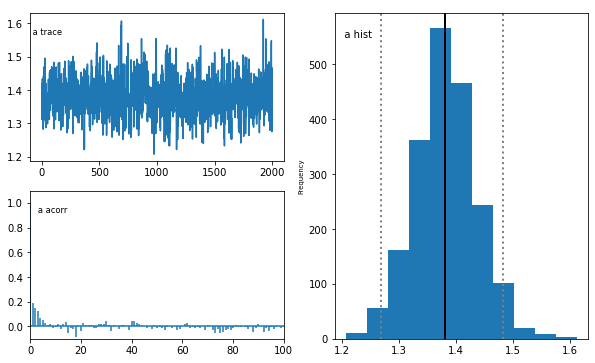

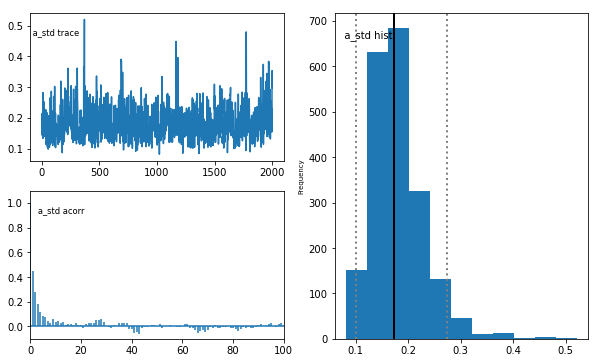

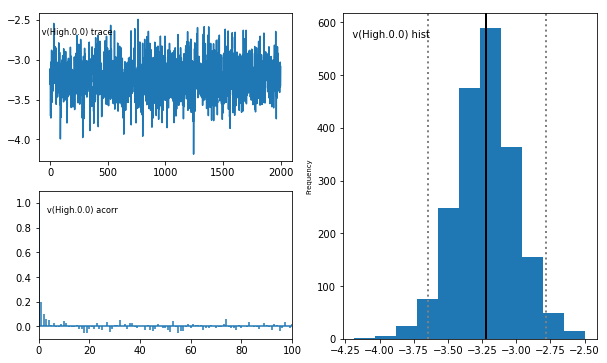

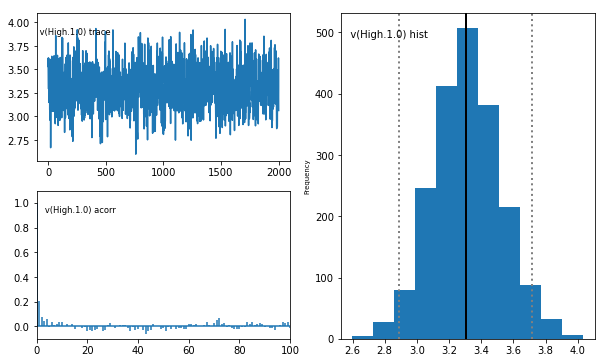

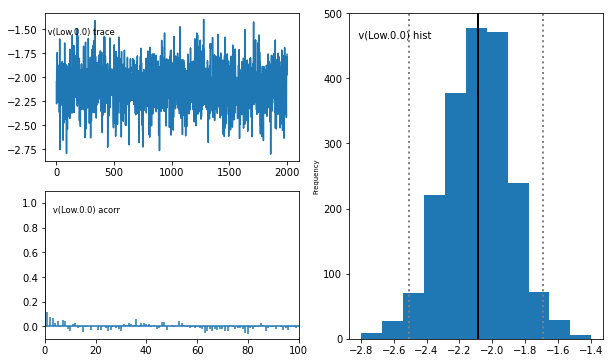

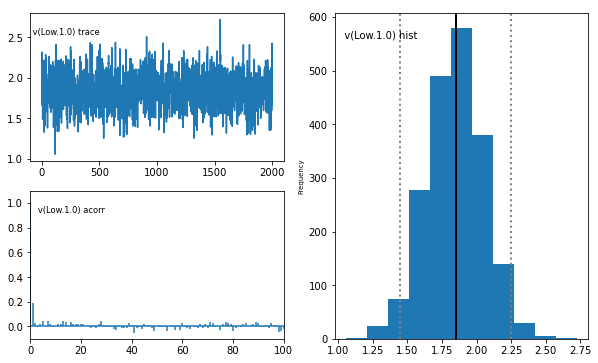

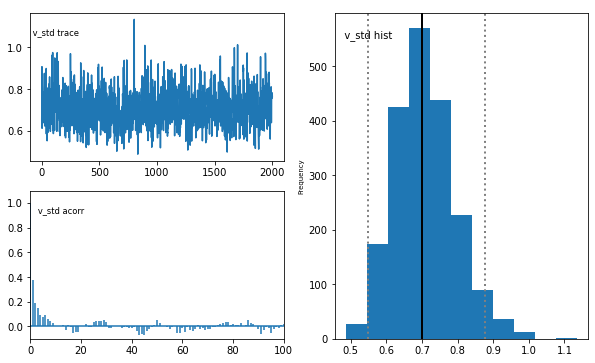

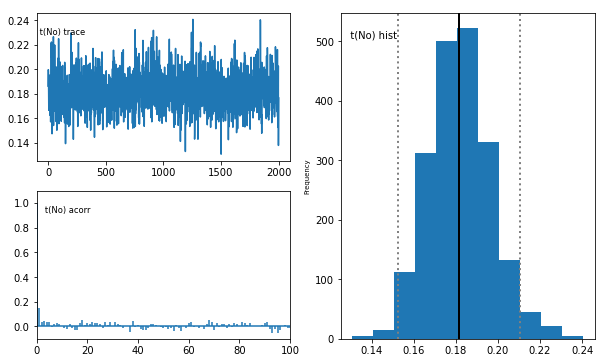

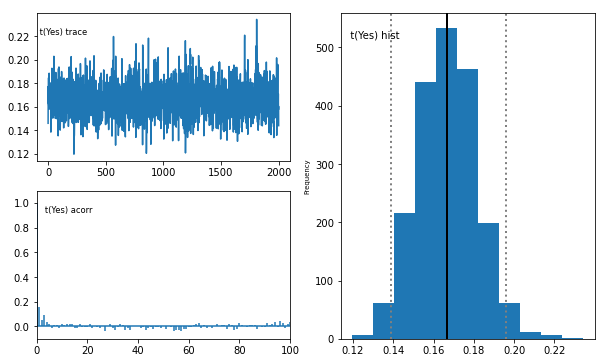

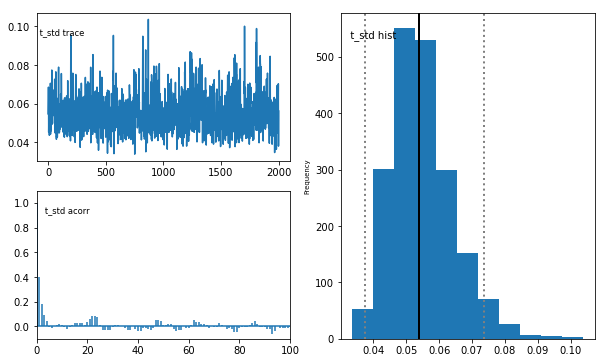

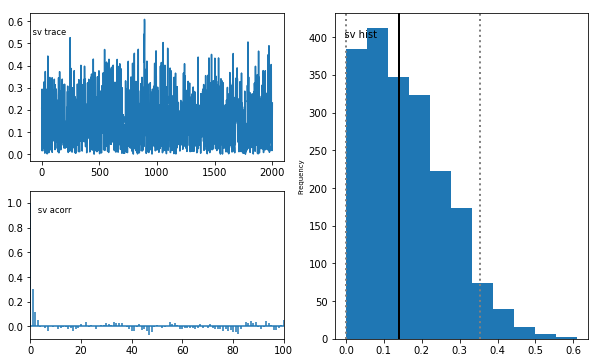

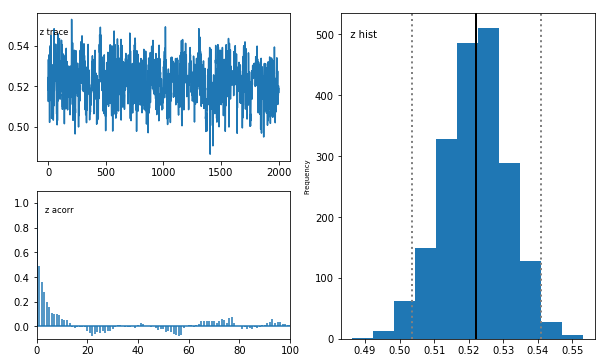

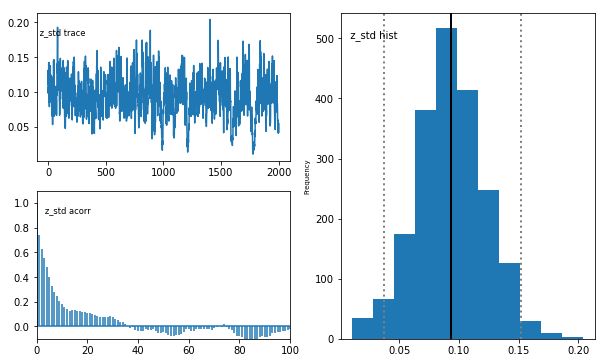

In [133]:
model1.plot_posteriors()

Plotting a
Plotting a_std
Plotting v(0.0)
Plotting v(1.0)
Plotting v_std
Plotting t(No)
Plotting t(Yes)
Plotting t_std
Plotting sv
Plotting z(High)
Plotting z(Low)
Plotting z_std


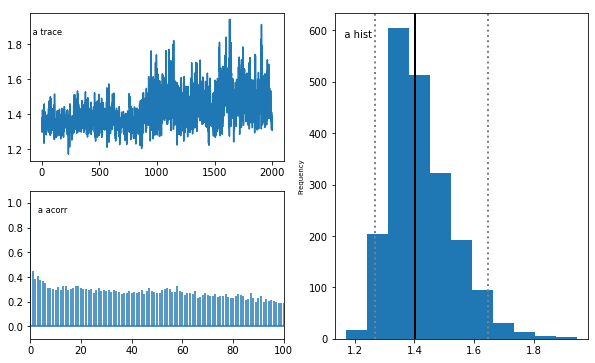

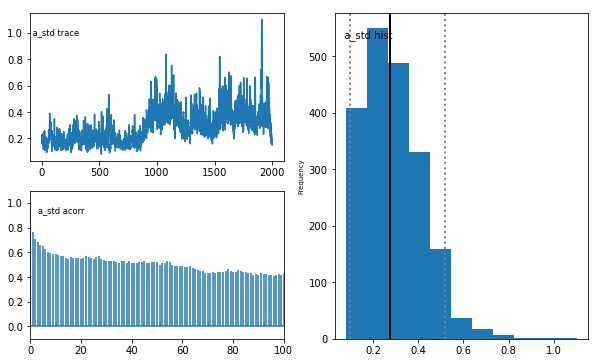

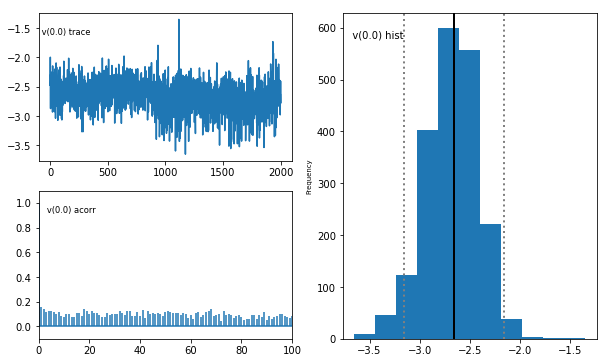

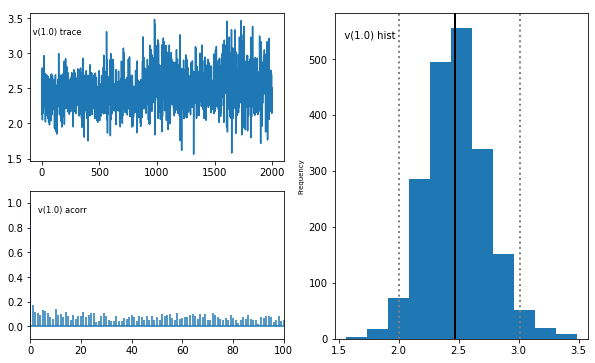

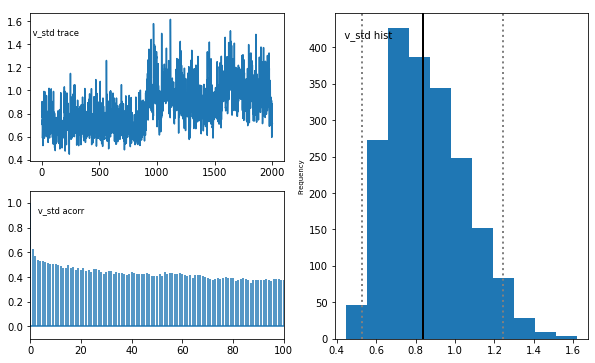

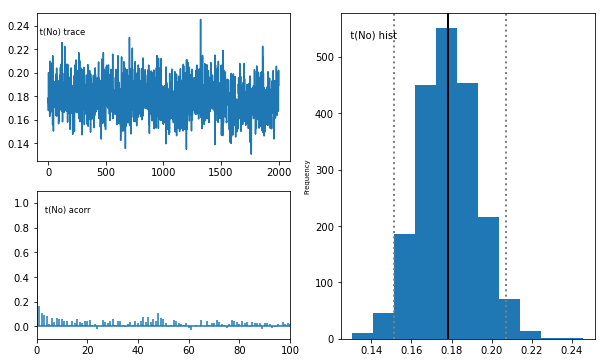

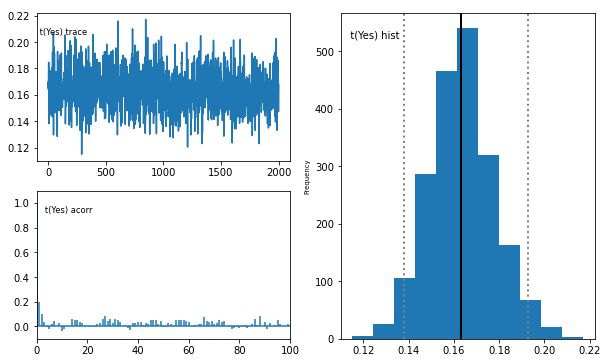

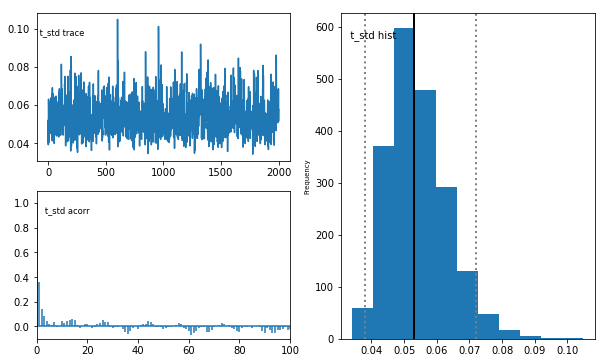

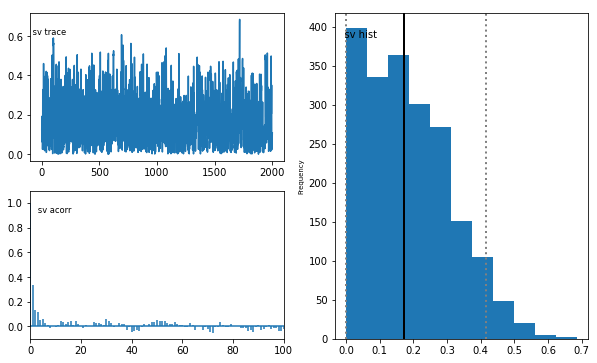

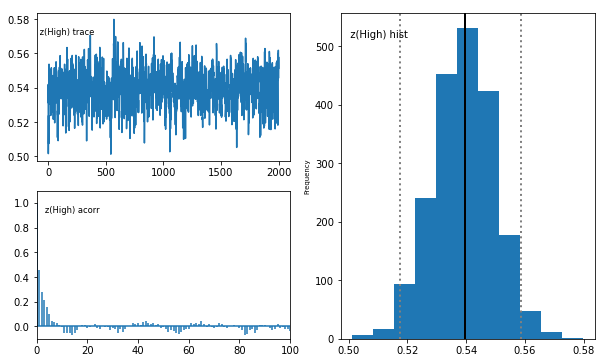

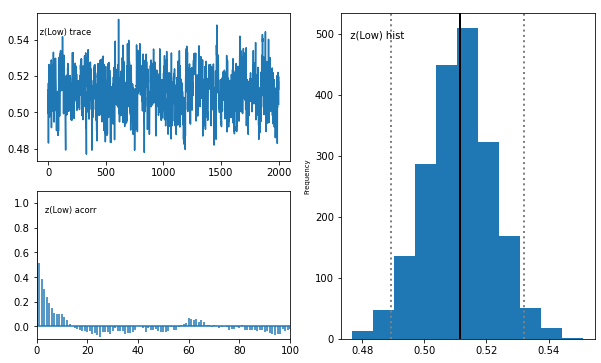

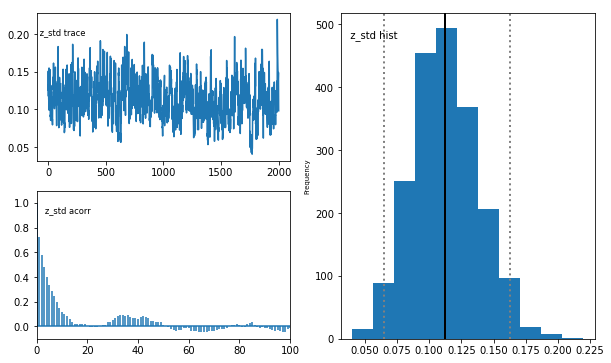

In [134]:
model2.plot_posteriors()

Plotting a(High)
Plotting a(Low)
Plotting a_std
Plotting v(0.0)
Plotting v(1.0)
Plotting v_std
Plotting t(No)
Plotting t(Yes)
Plotting t_std
Plotting sv
Plotting z
Plotting z_std


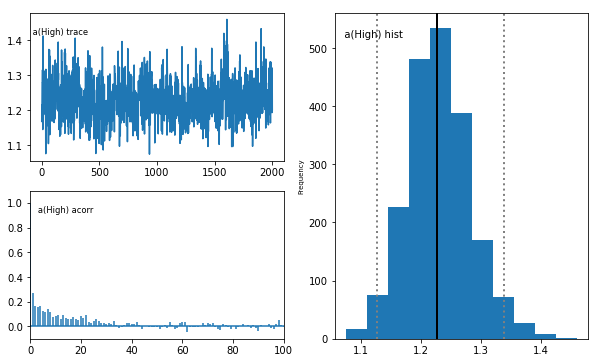

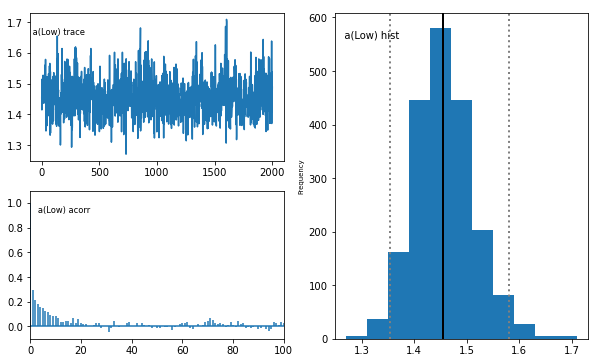

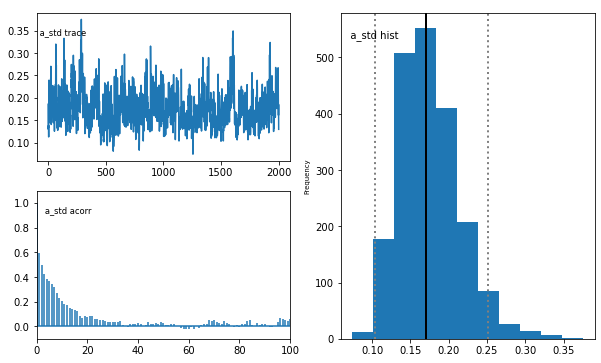

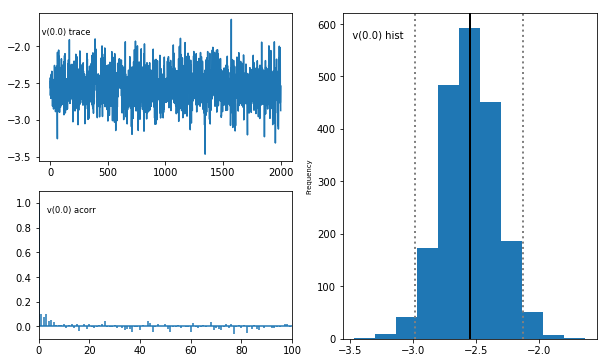

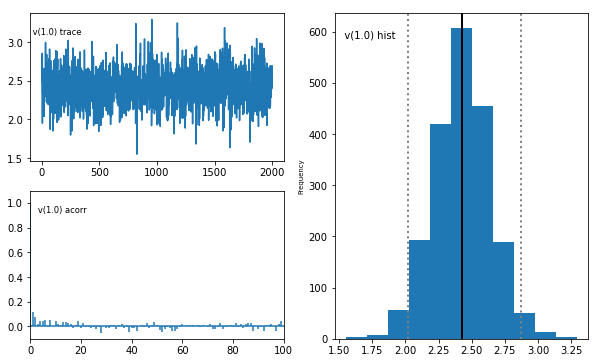

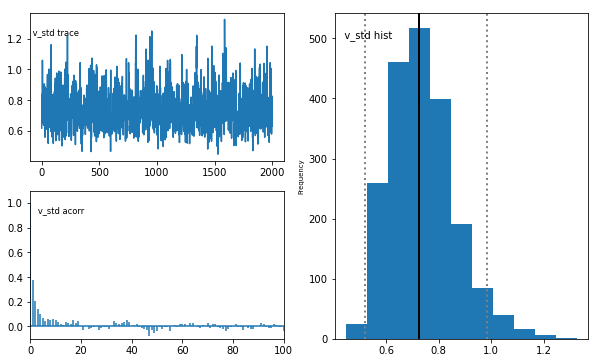

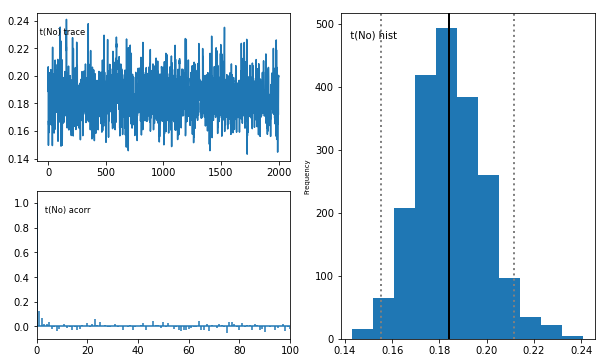

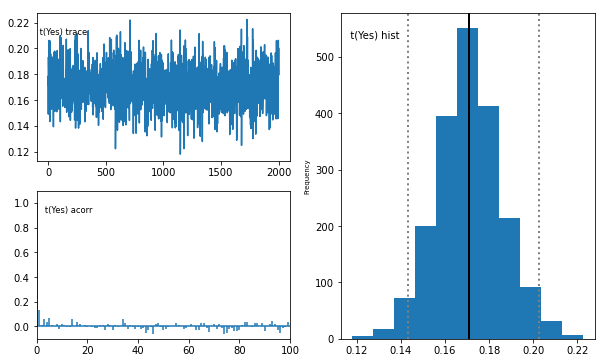

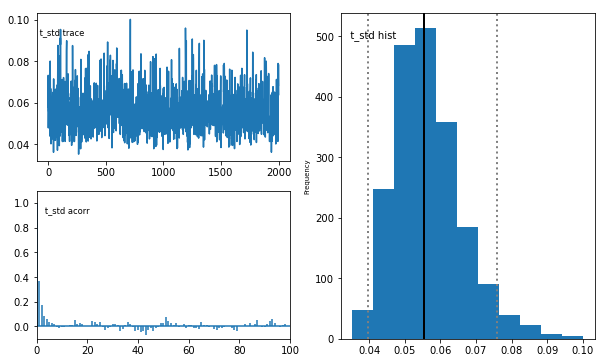

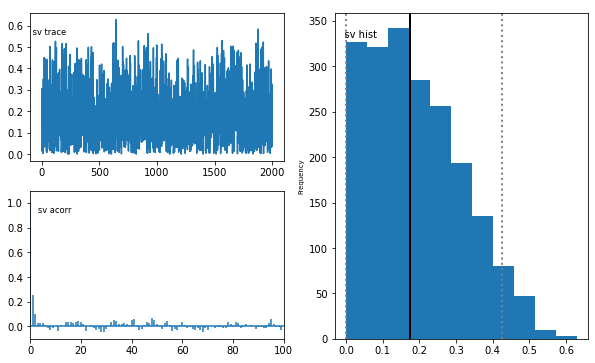

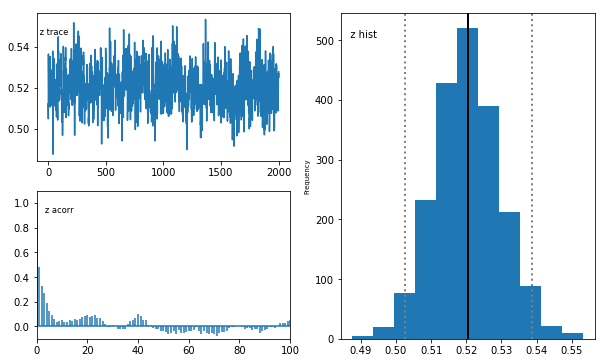

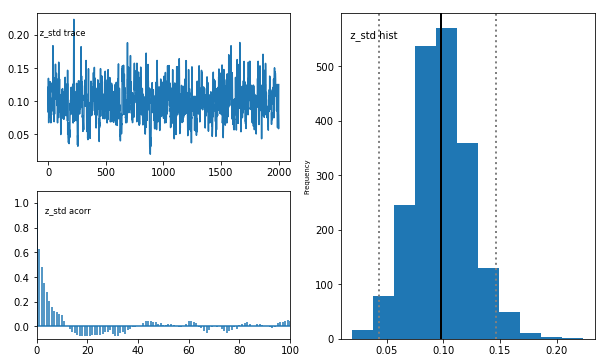

In [135]:
model3.plot_posteriors()

Plotting a
Plotting a_std
Plotting v(0.0)
Plotting v(1.0)
Plotting v_std
Plotting t(High.No)
Plotting t(High.Yes)
Plotting t(Low.No)
Plotting t(Low.Yes)
Plotting t_std
Plotting sv
Plotting z
Plotting z_std


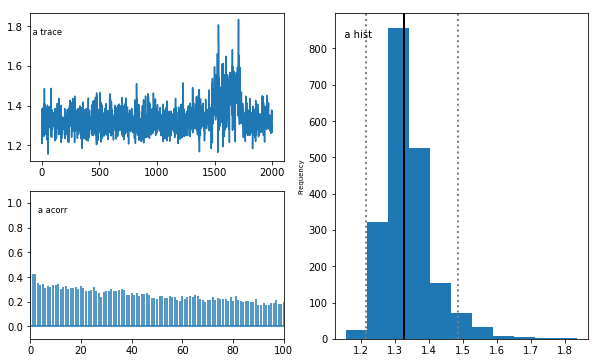

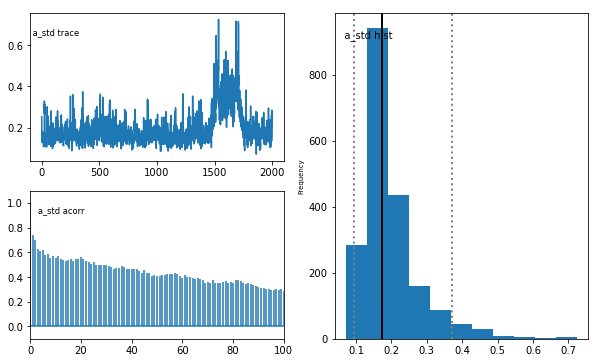

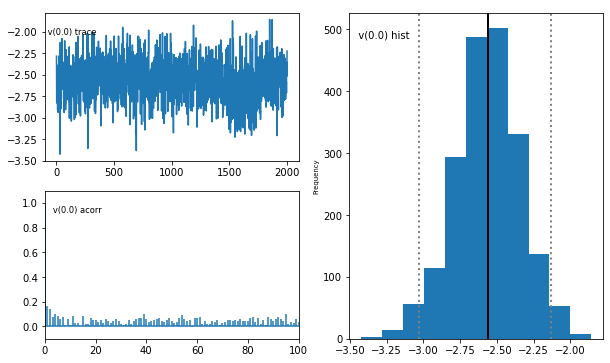

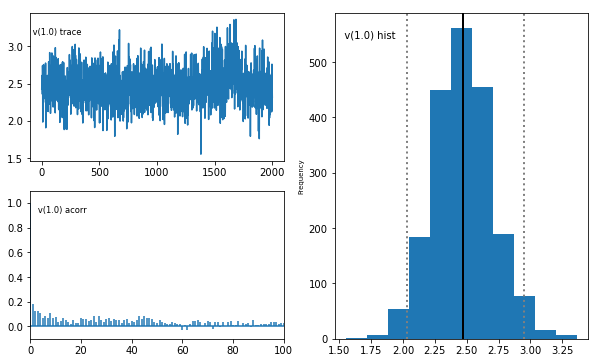

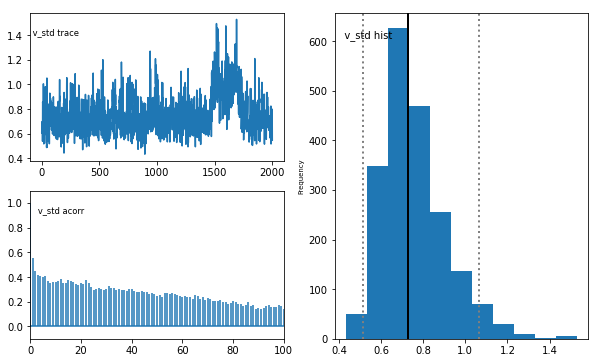

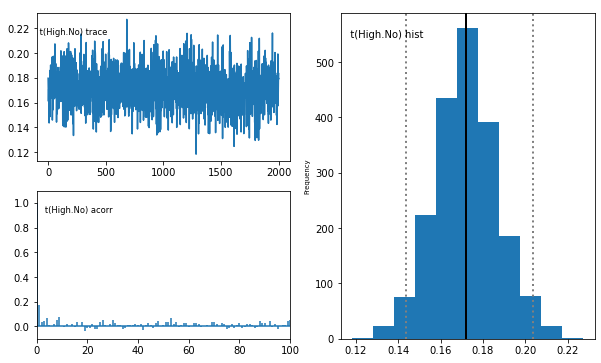

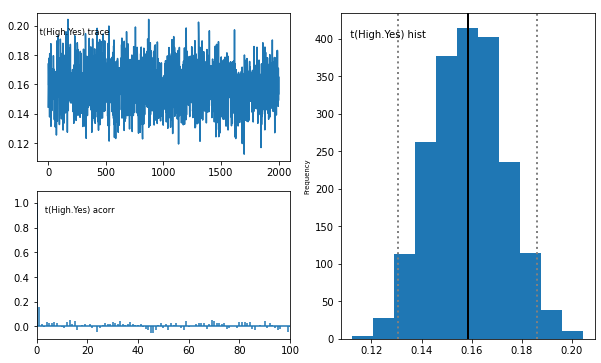

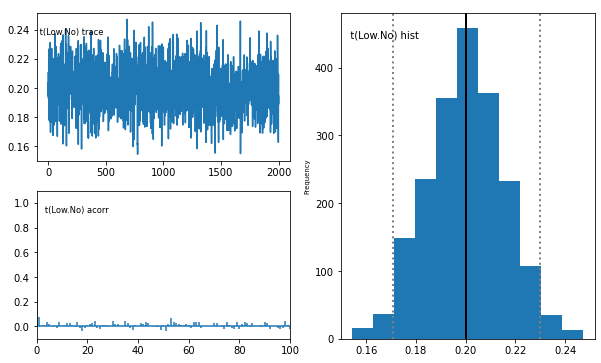

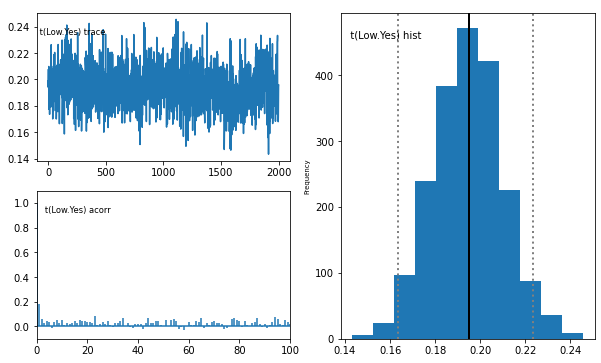

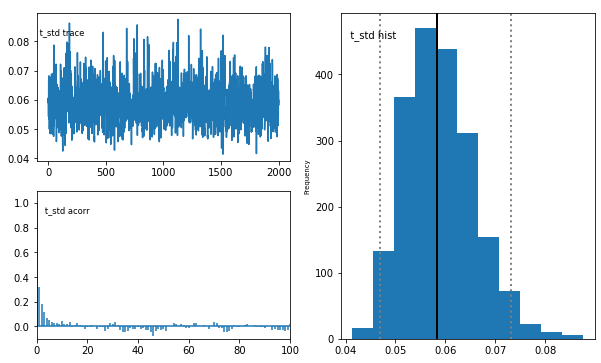

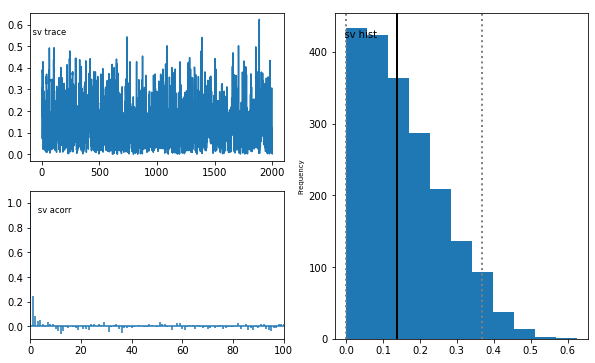

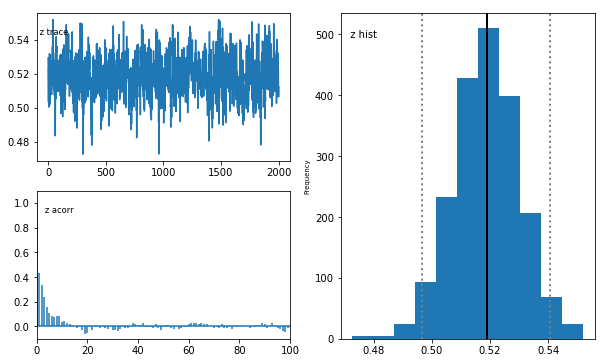

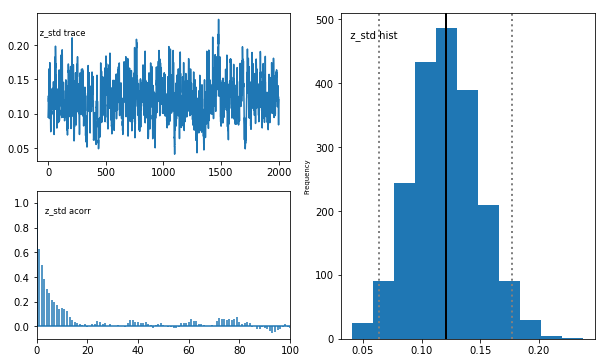

In [136]:
model4.plot_posteriors()

## 模型参数后验分布预测

(-2.0, 2.0)

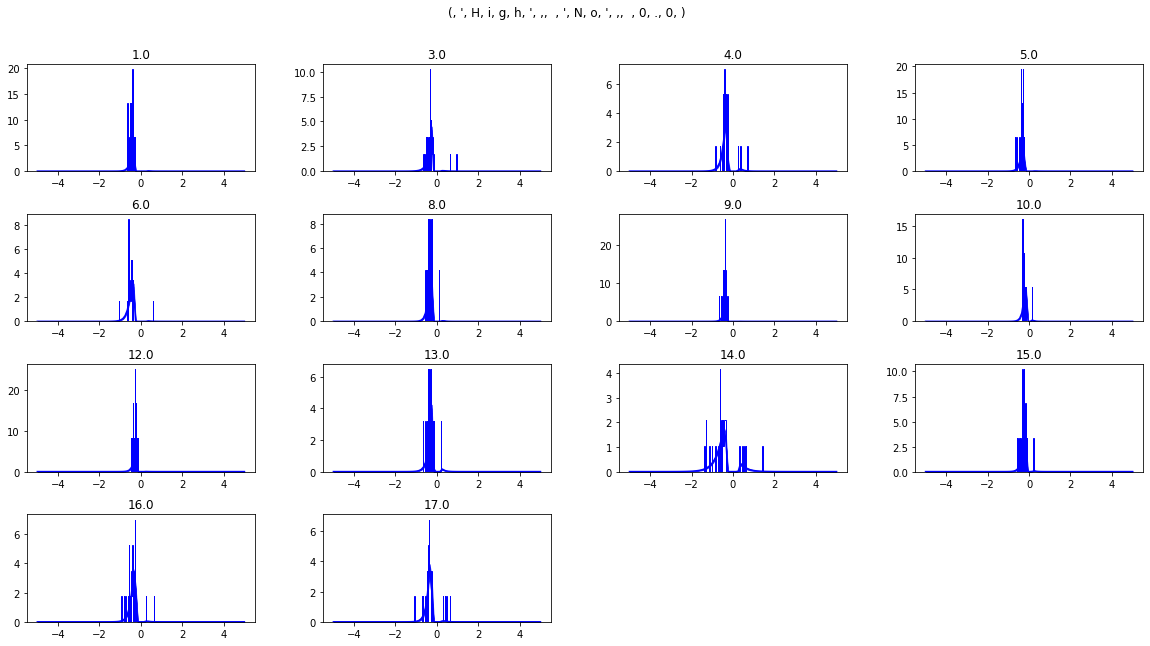

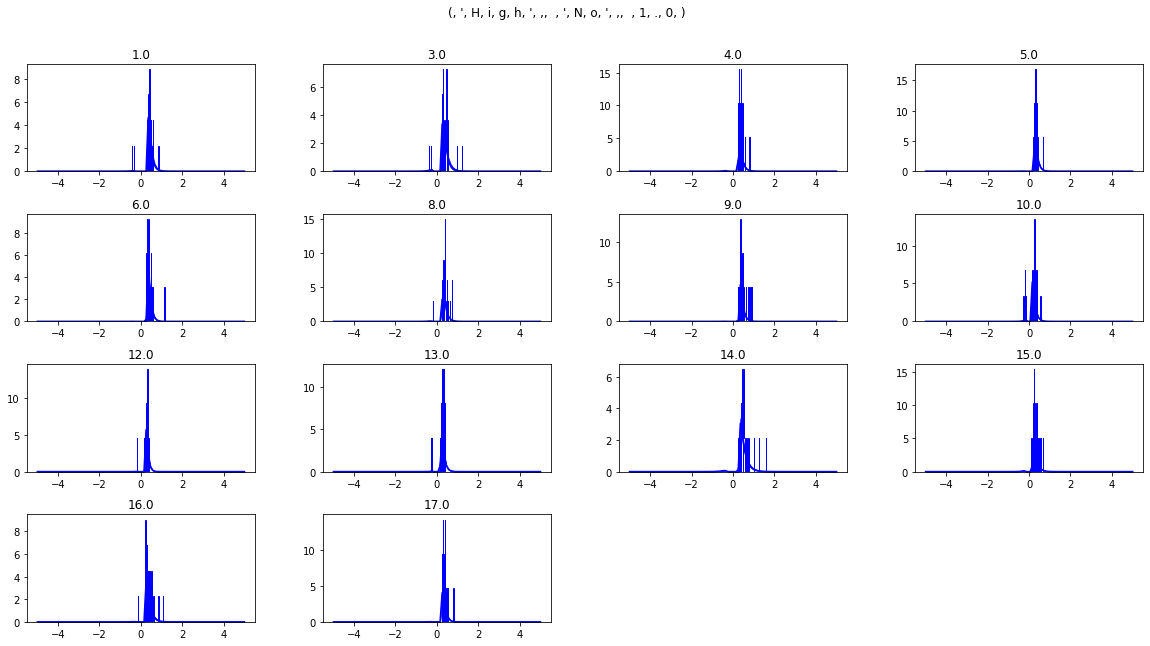

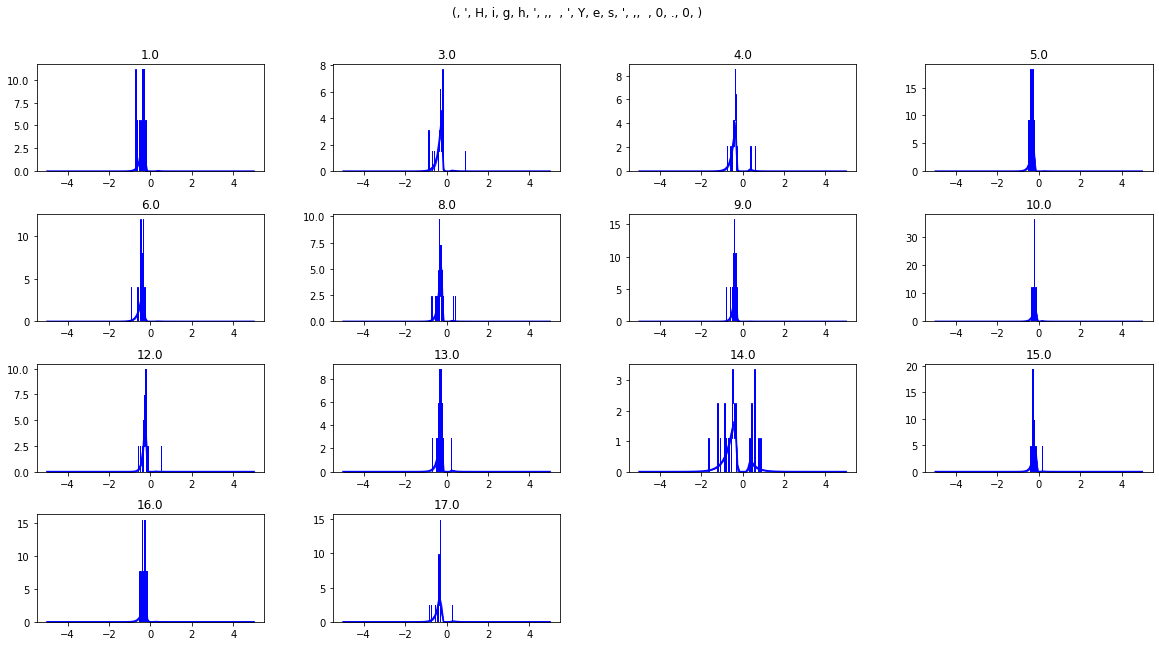

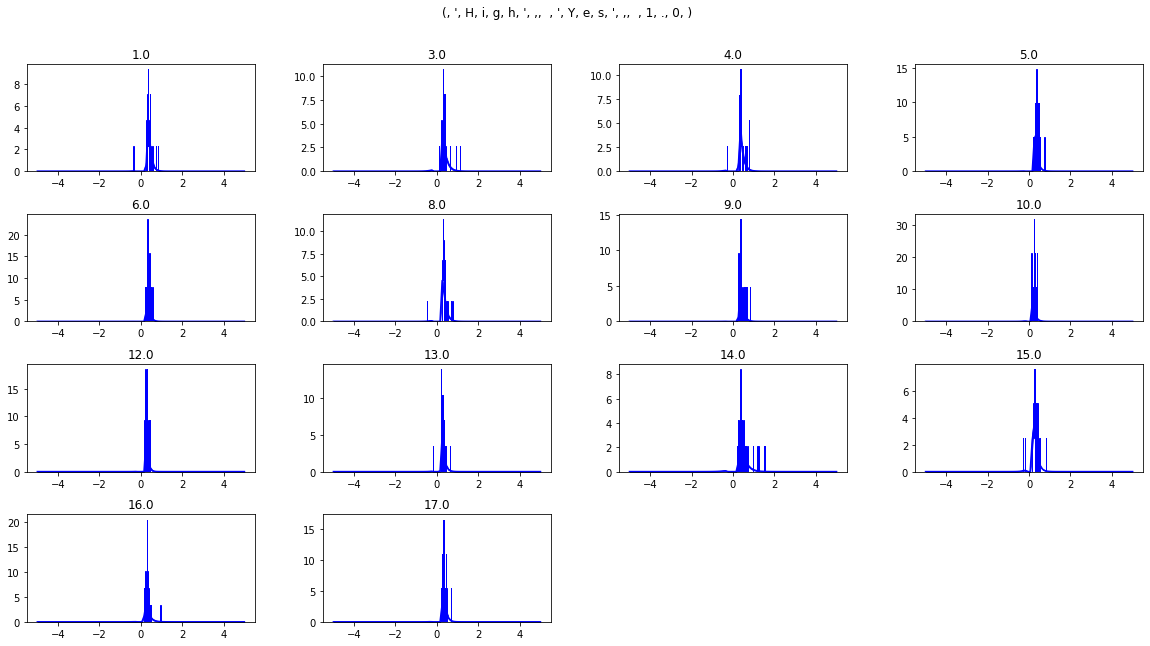

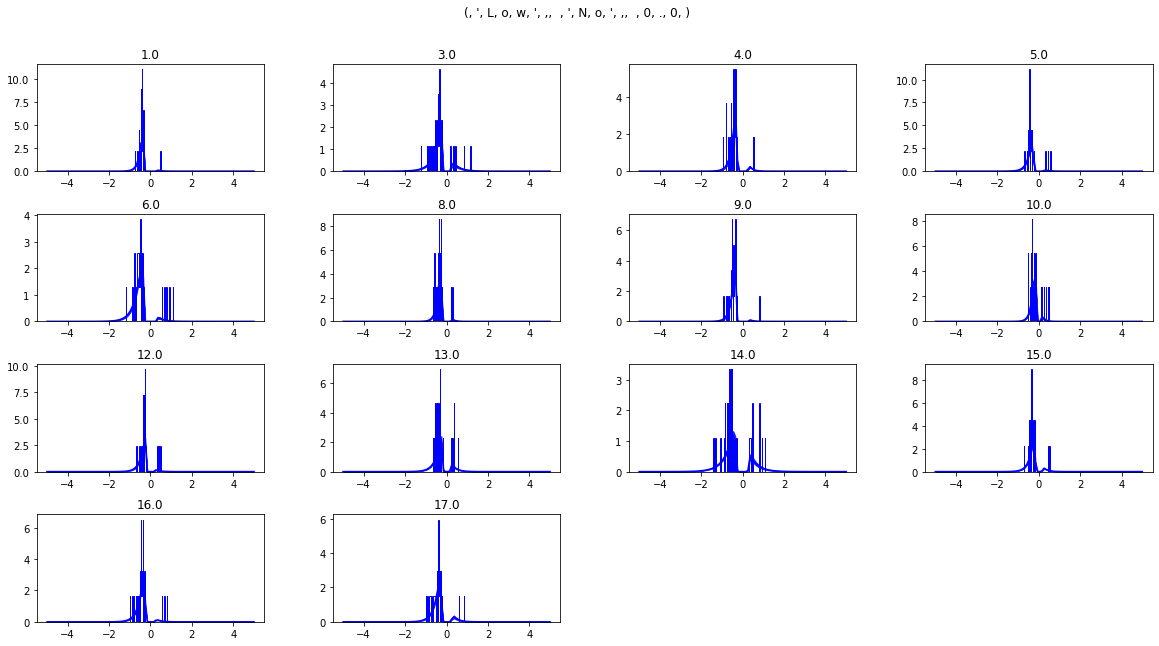

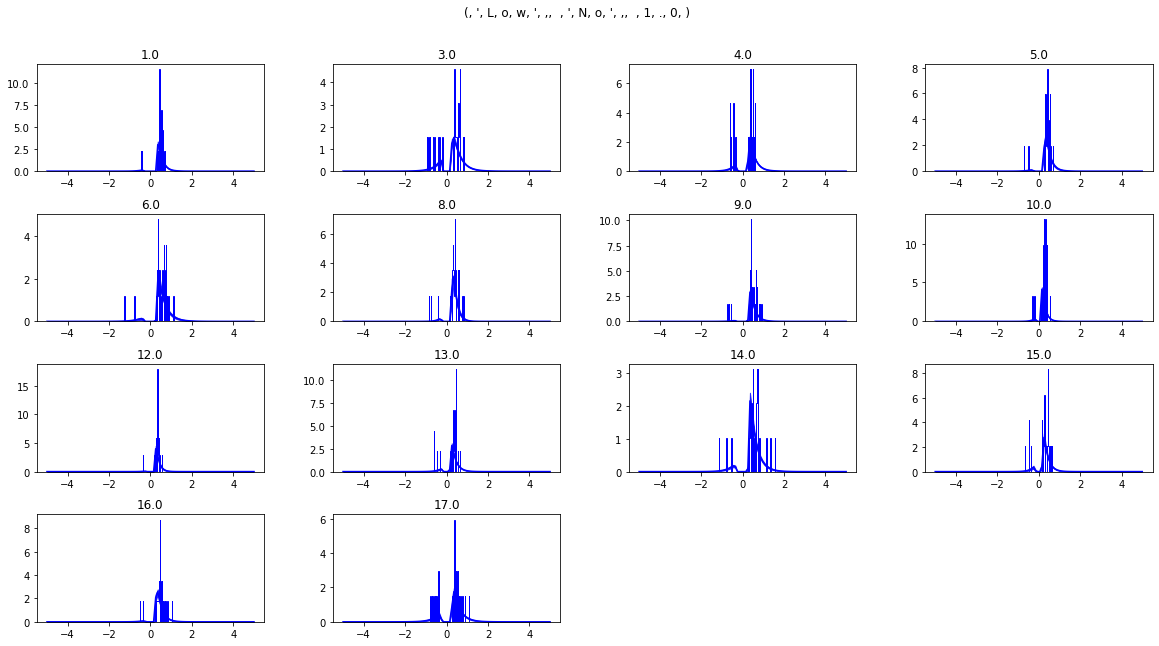

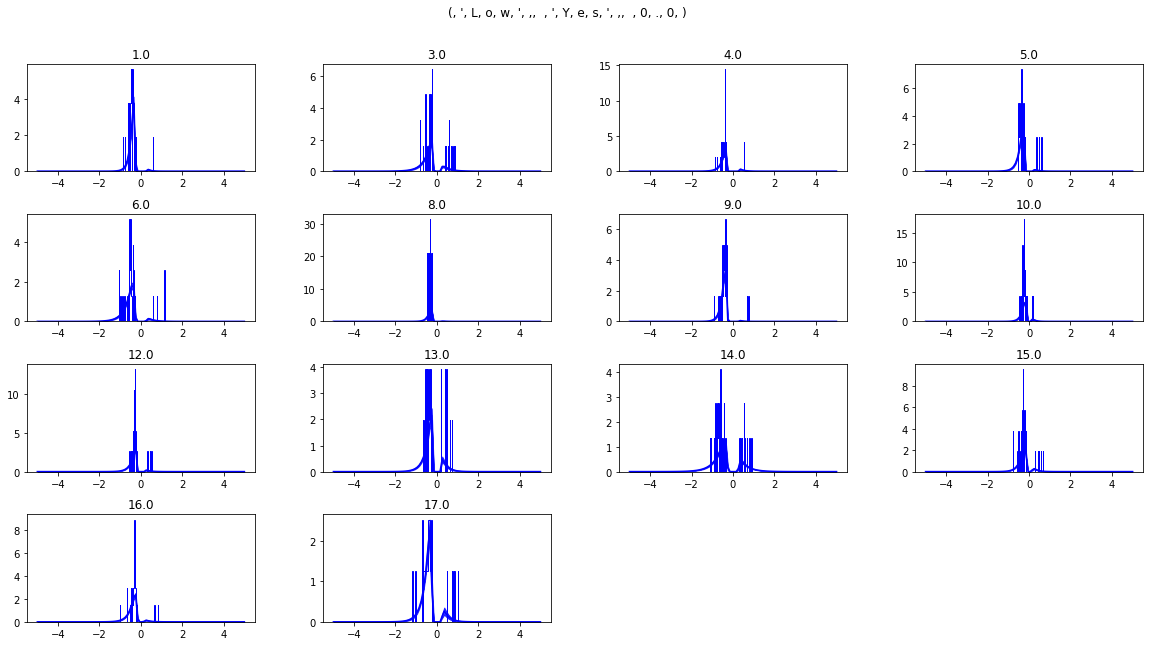

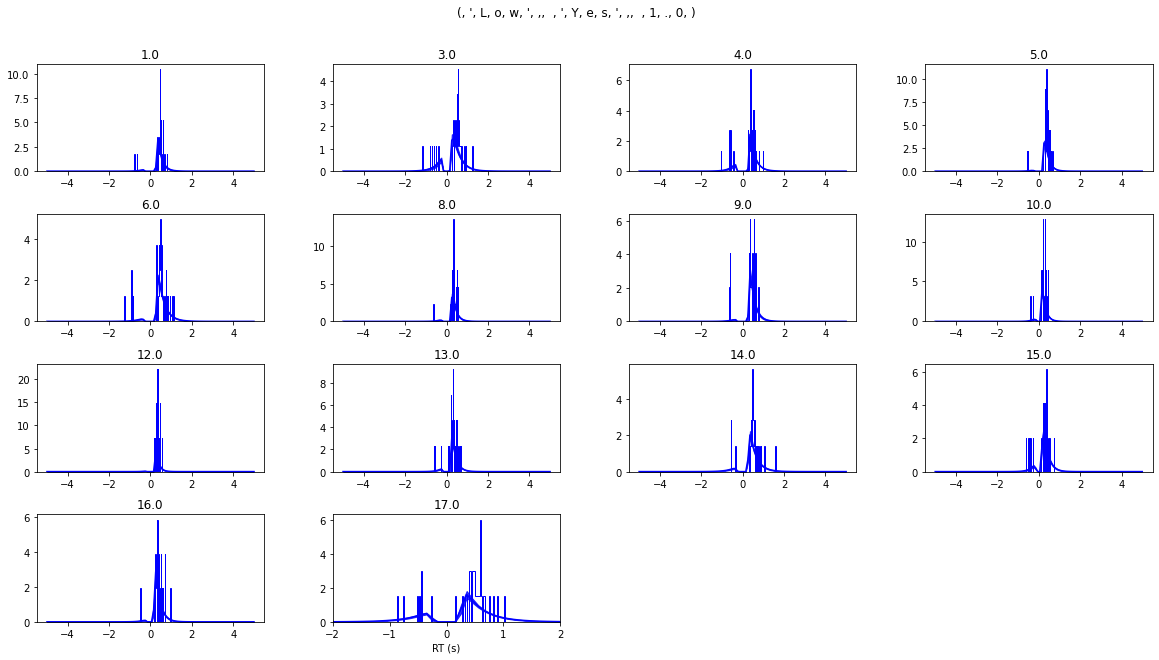

In [55]:
model1.plot_posterior_predictive(figsize=(20,10), columns=4)
plt.xlabel('RT (s)')
plt.xlim([-2, 2])

(-2.0, 2.0)

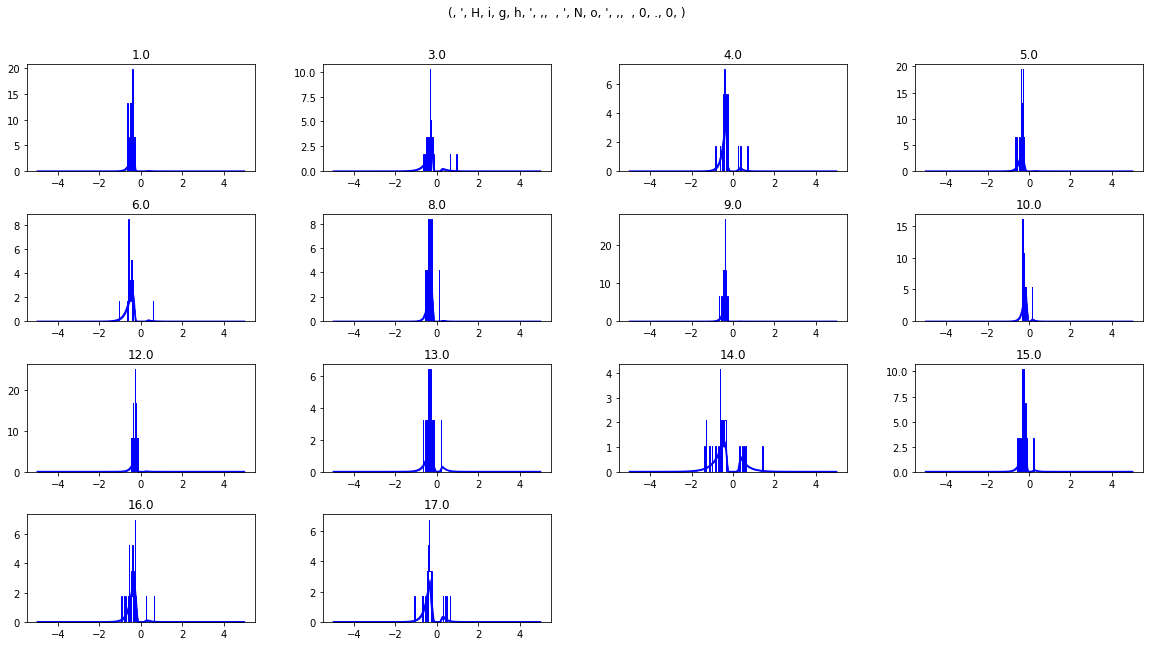

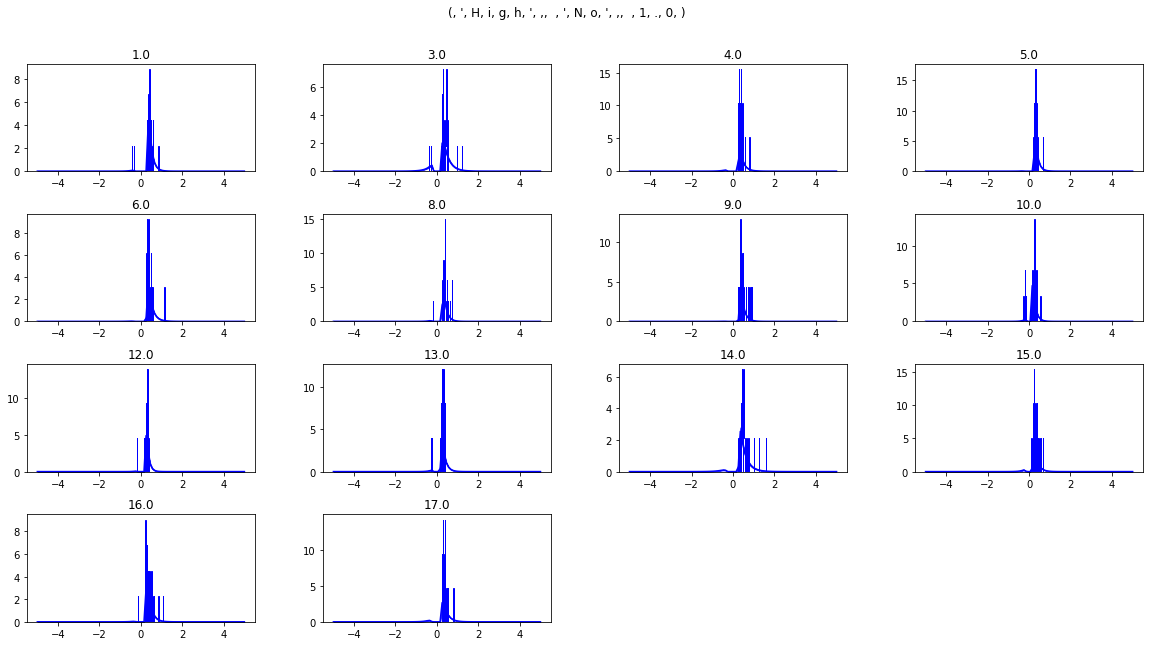

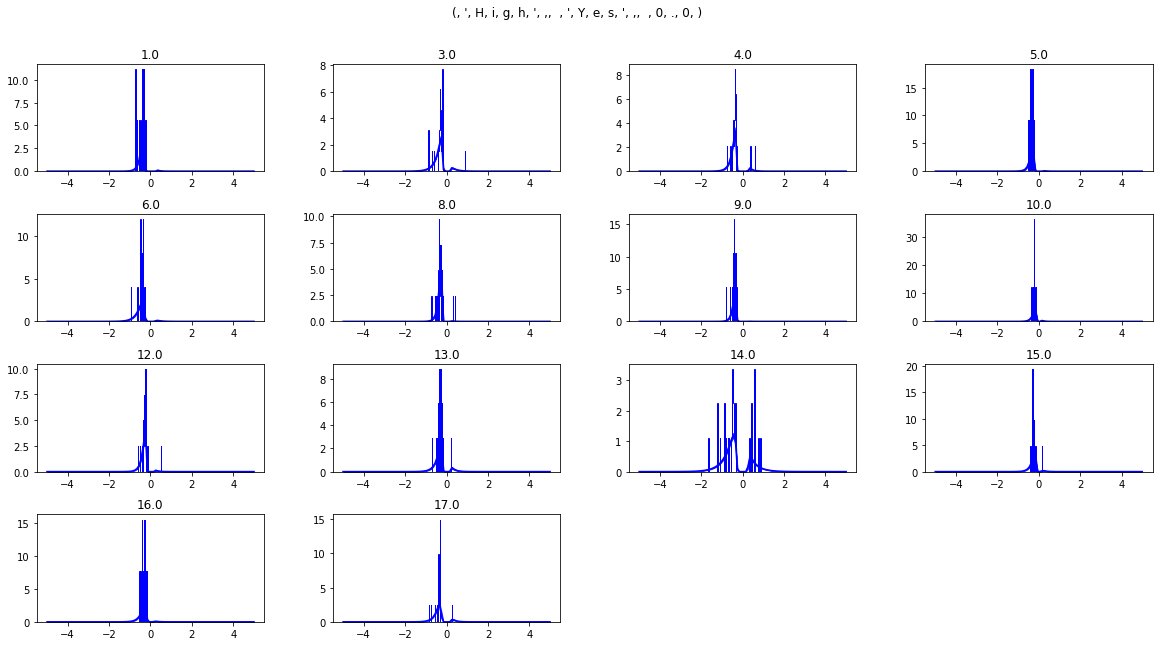

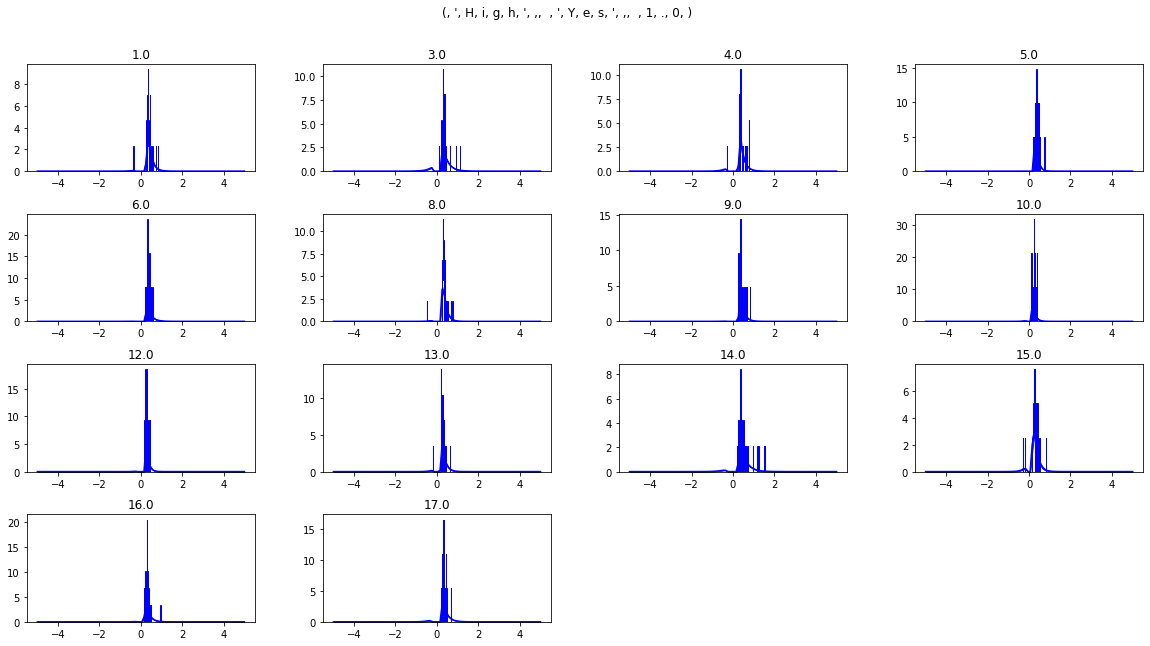

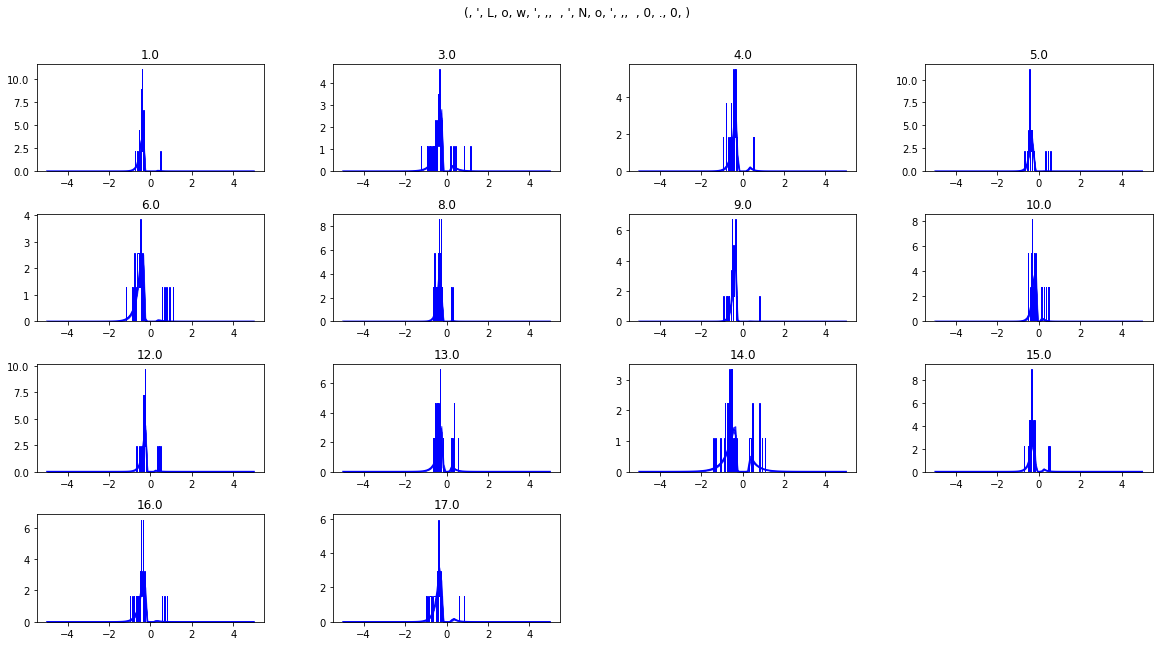

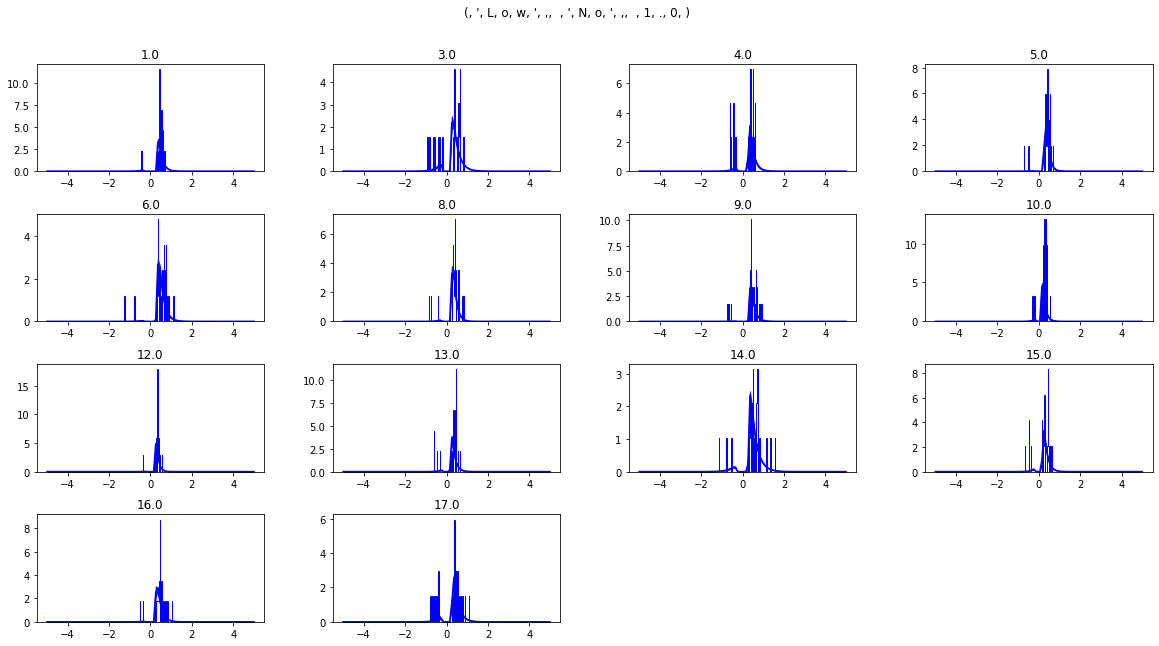

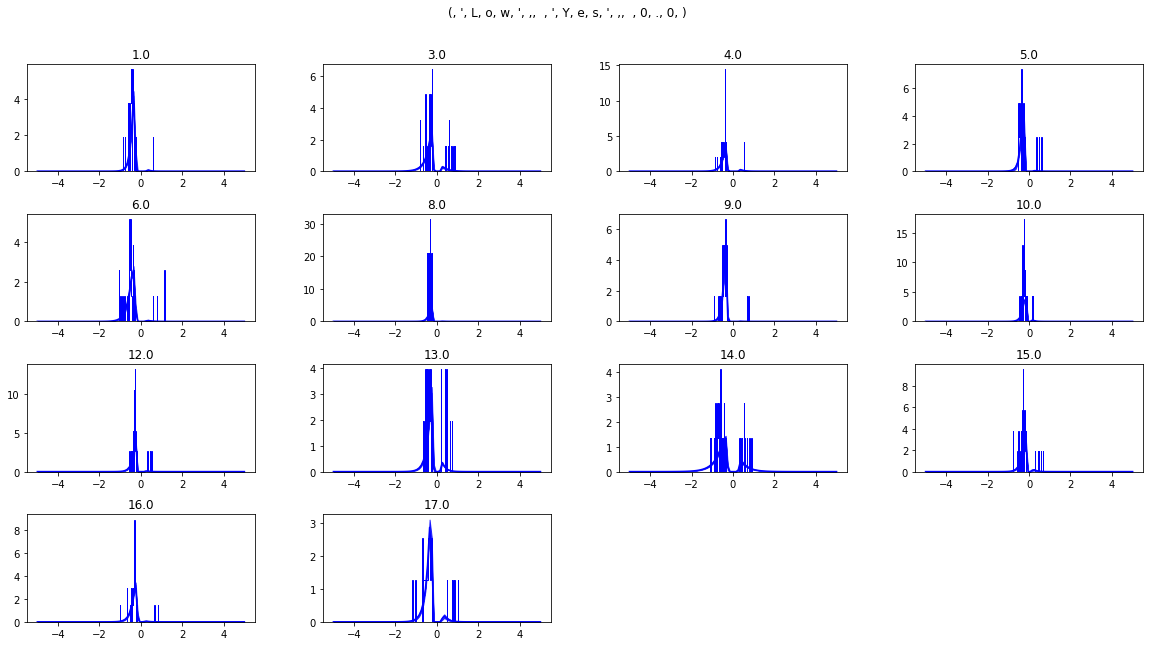

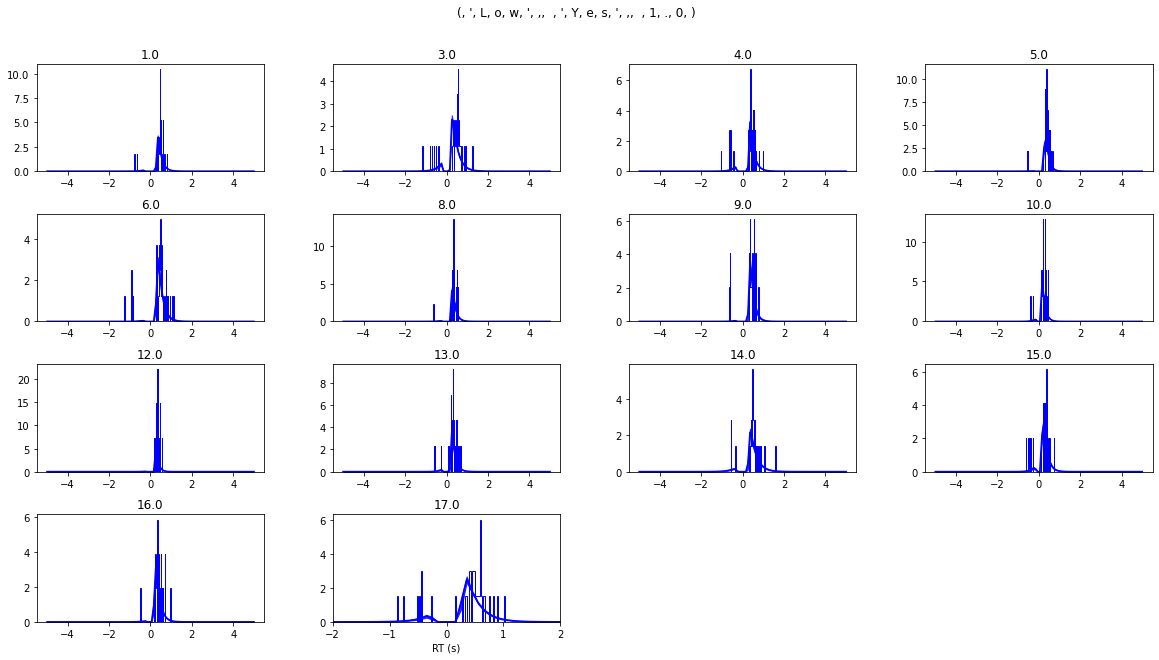

In [56]:
model2.plot_posterior_predictive(figsize=(20,10), columns=4)
plt.xlabel('RT (s)')
plt.xlim([-2, 2])

(-2.0, 2.0)

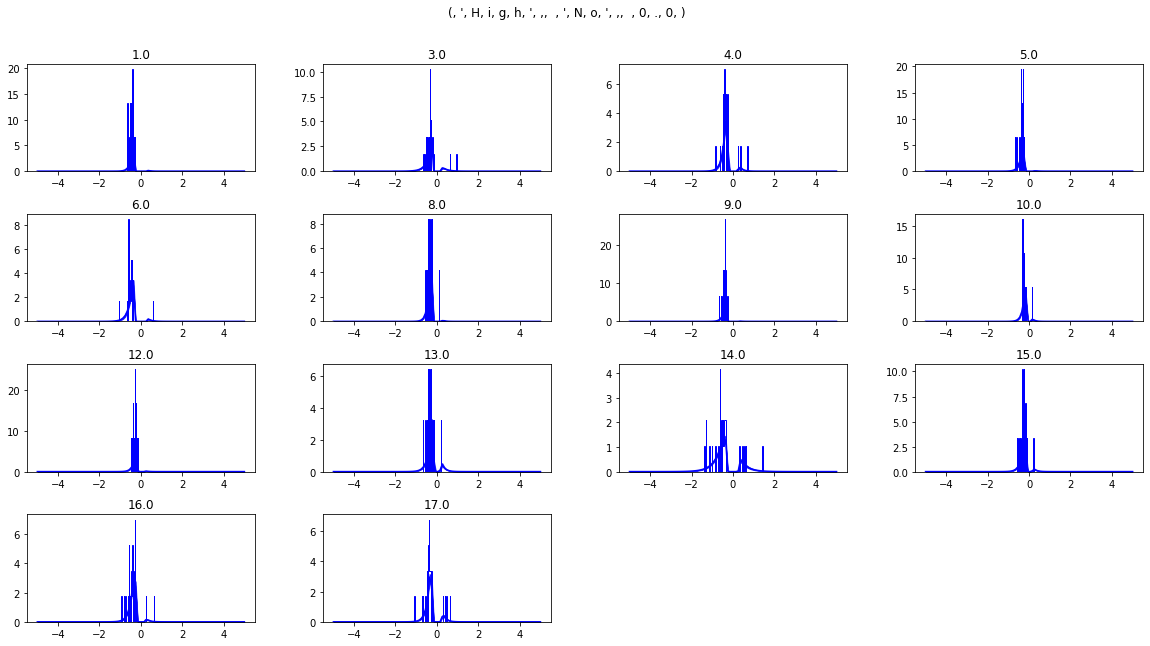

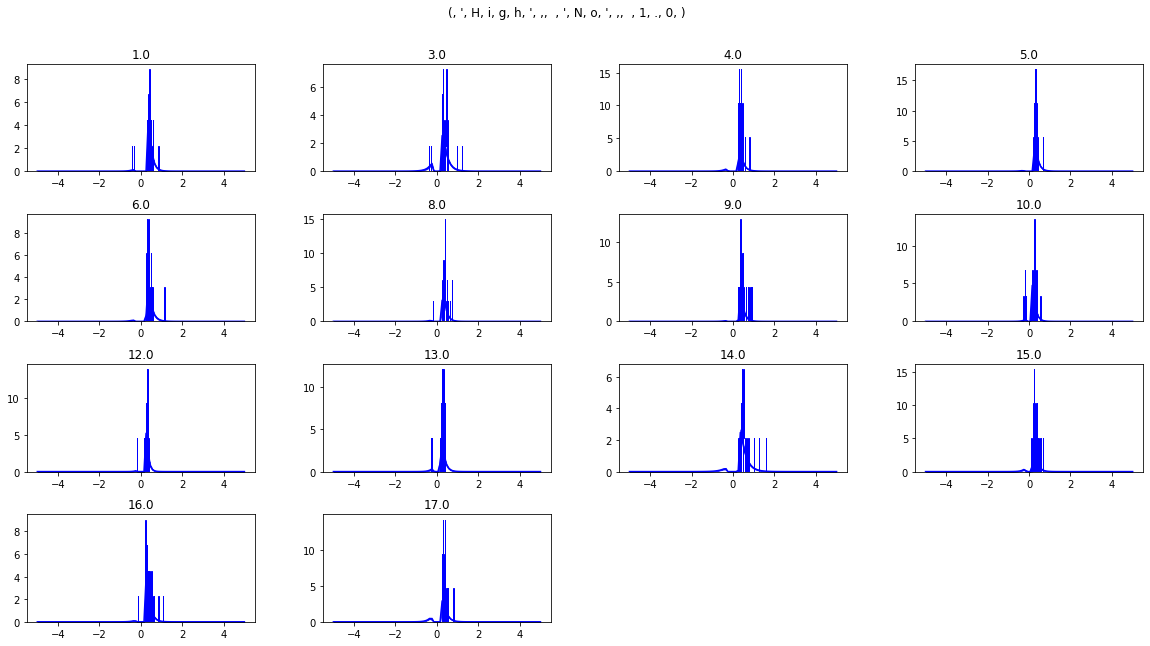

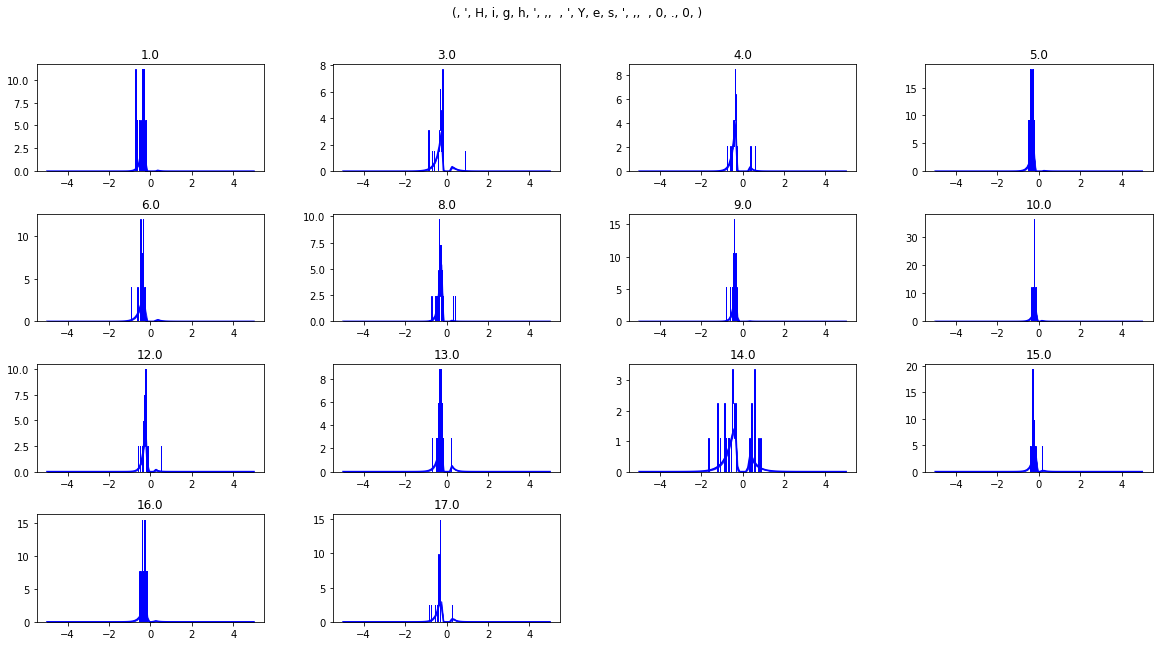

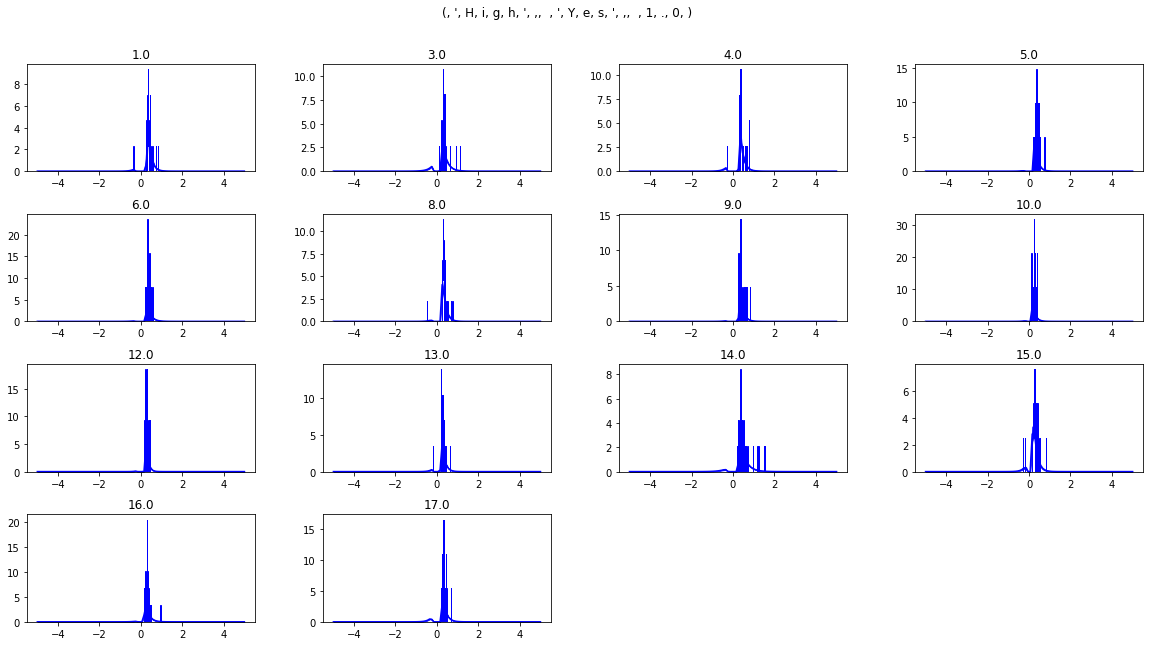

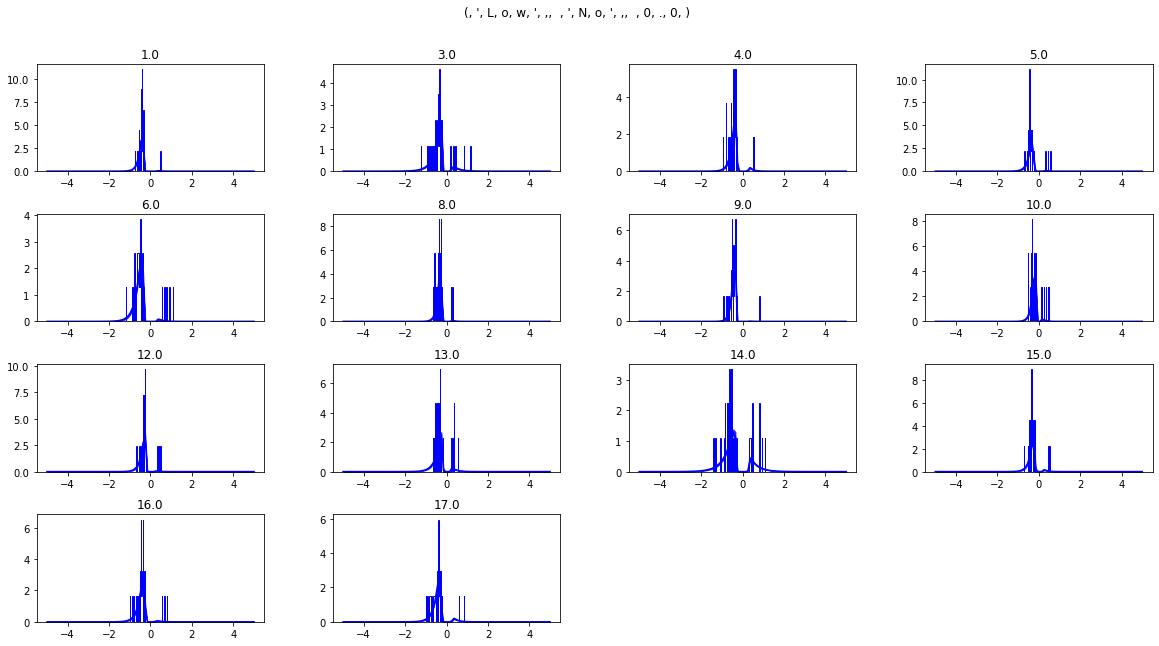

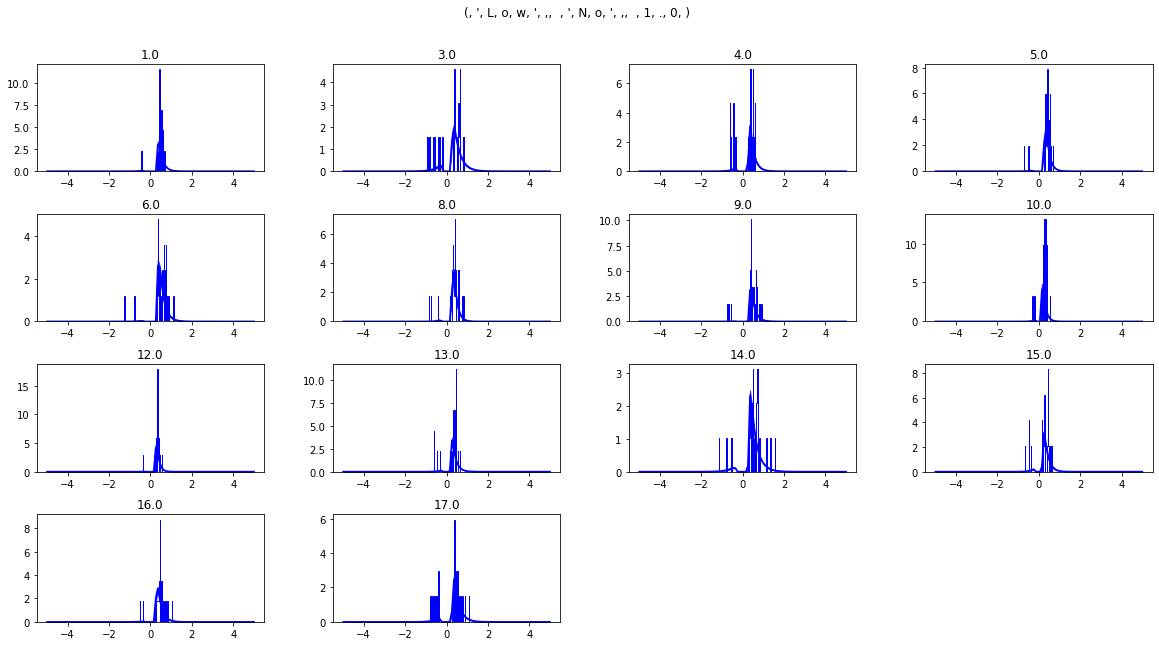

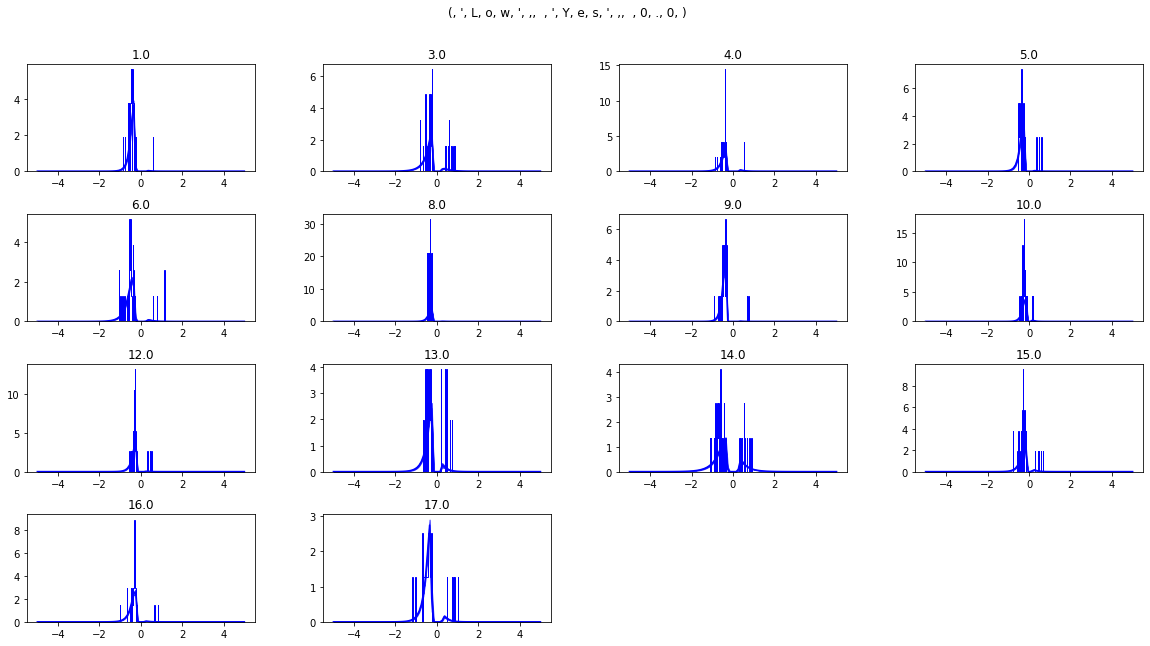

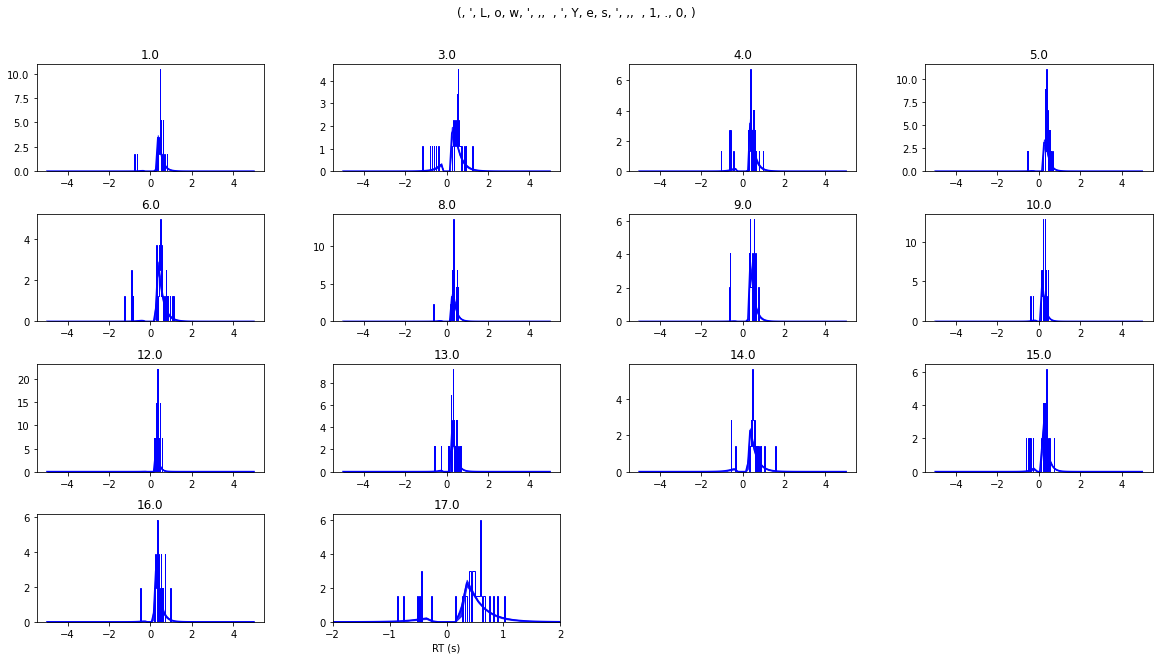

In [57]:
model3.plot_posterior_predictive(figsize=(20,10), columns=4)
plt.xlabel('RT (s)')
plt.xlim([-2, 2])

(-2.0, 2.0)

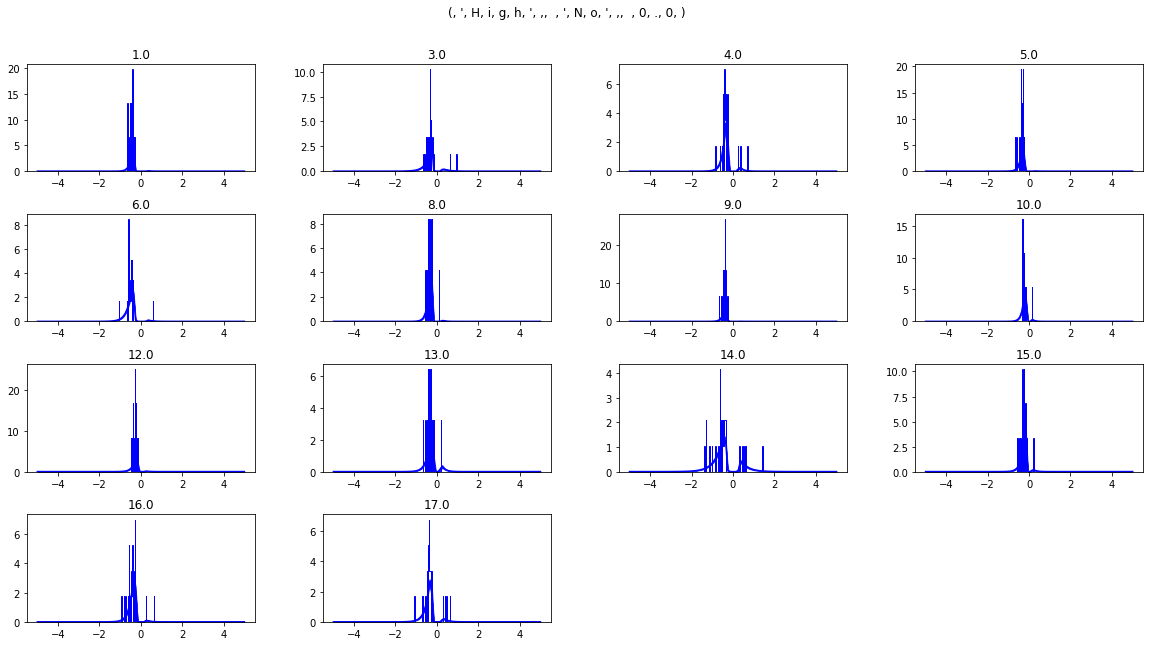

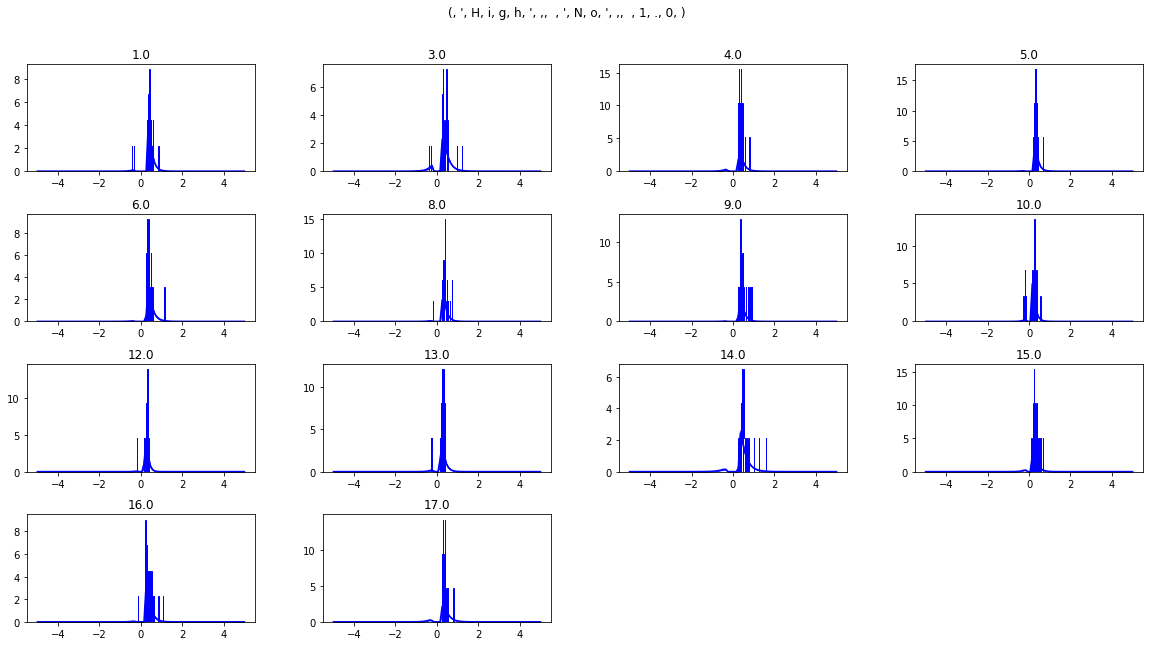

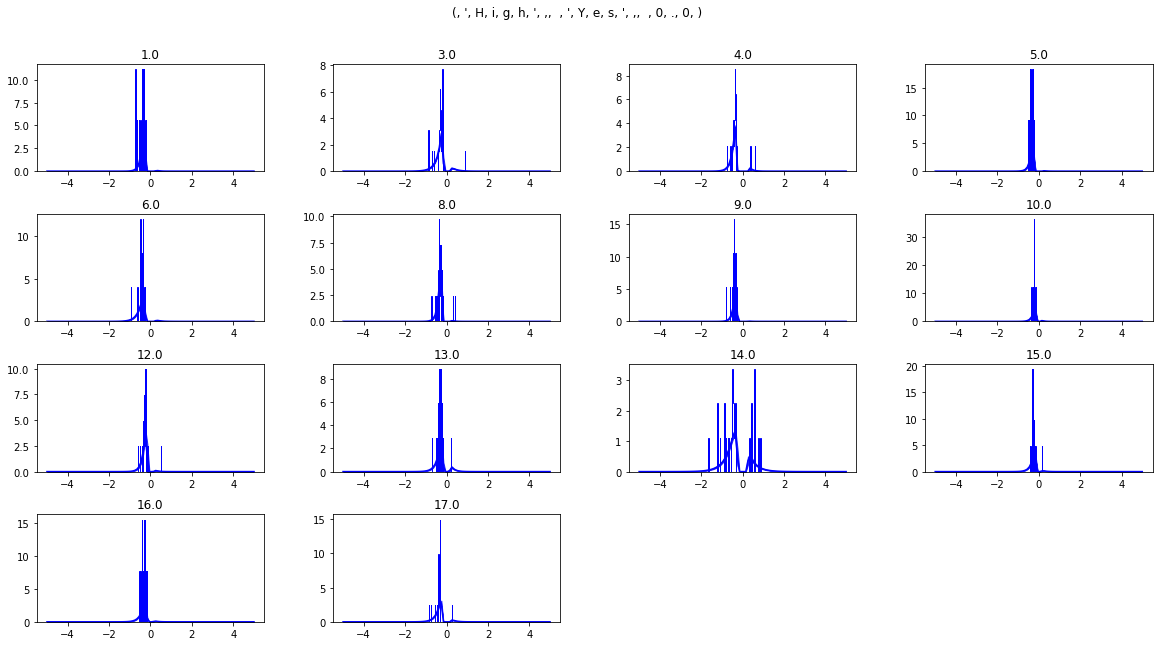

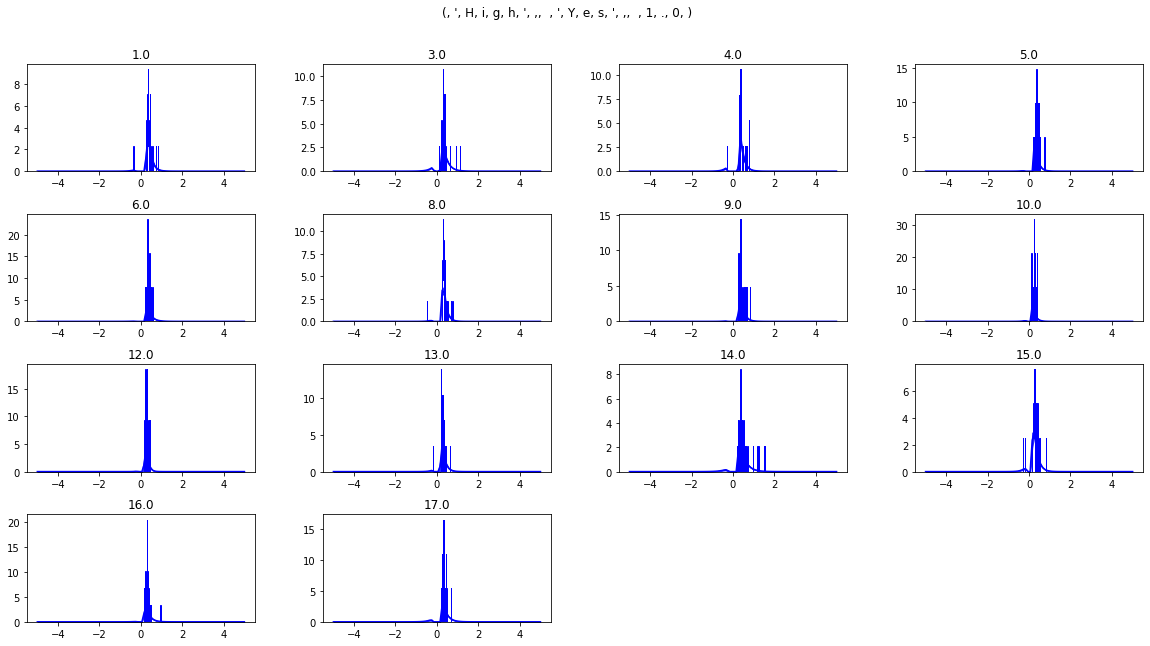

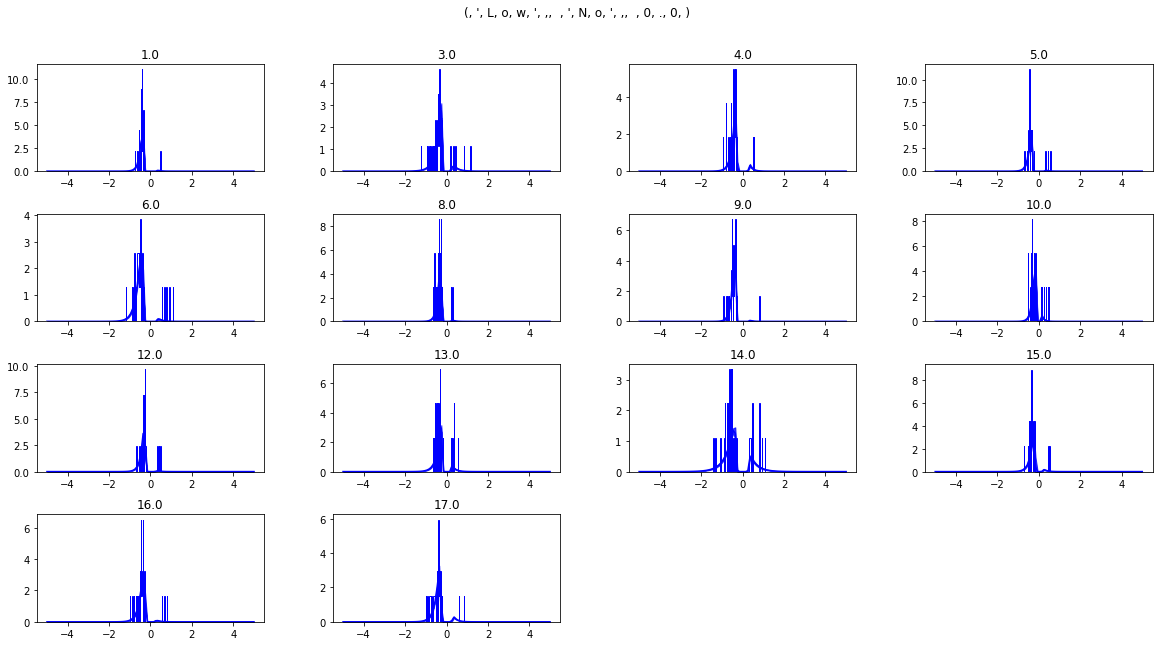

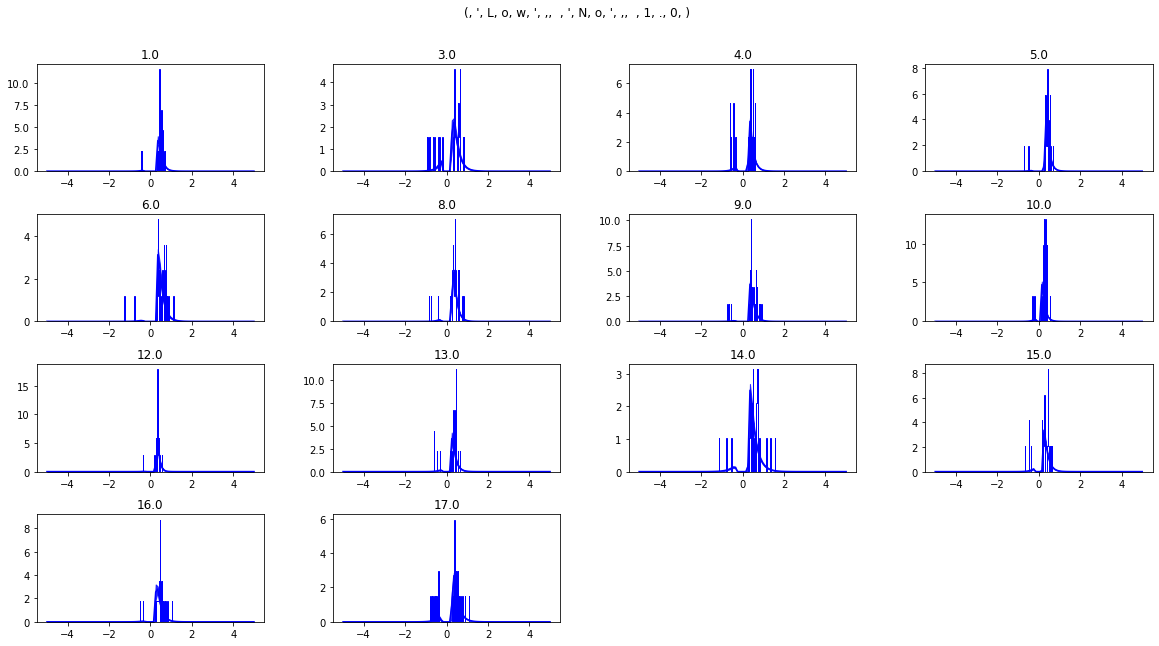

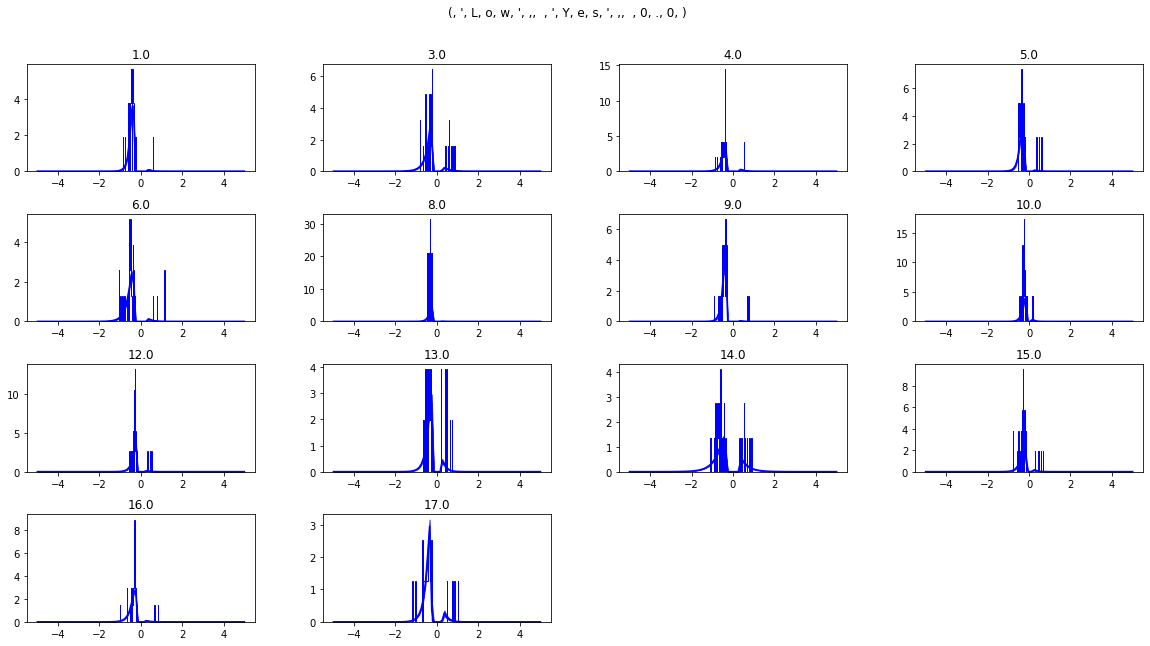

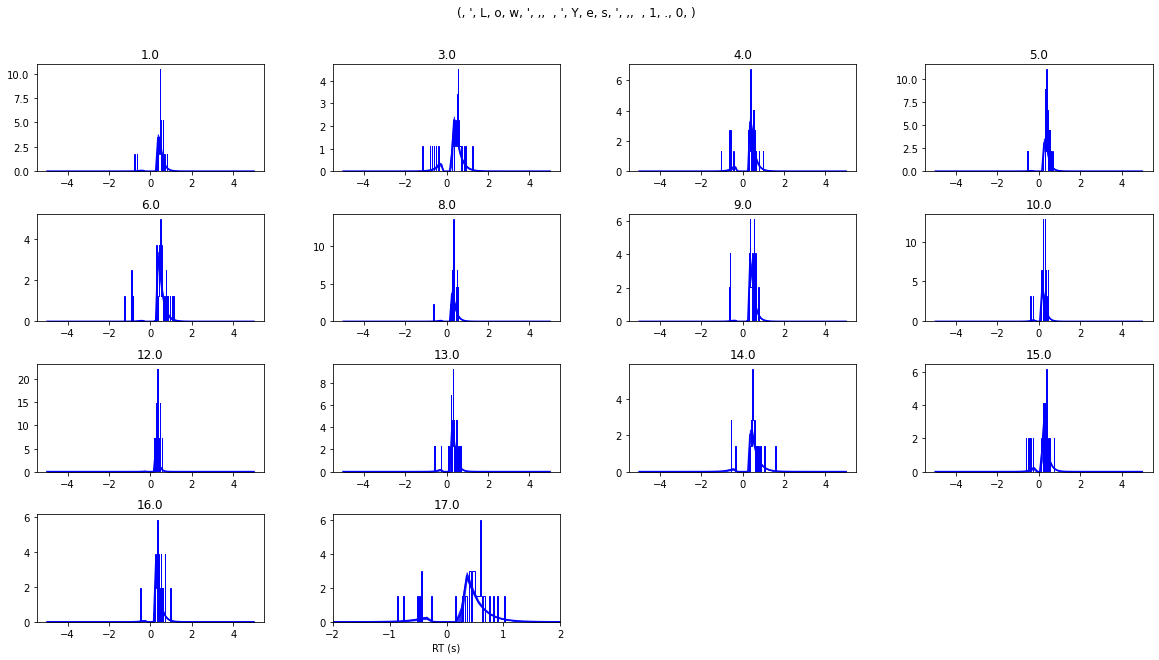

In [58]:
model4.plot_posterior_predictive(figsize=(20,10), columns=4)
plt.xlabel('RT (s)')
plt.xlim([-2, 2])

## 模型参数后验分布比较

Text(0.5, 1.0, 'Posterior of drift-rate group means')

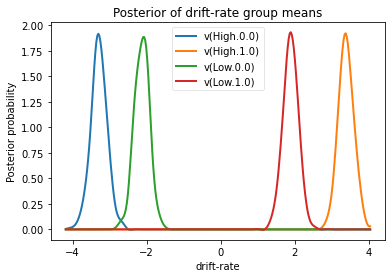

In [59]:
v1, v2, v3, v4 = model1.nodes_db.node[['v(High.0.0)', 'v(High.1.0)','v(Low.0.0)', 'v(Low.1.0)']]
hddm.analyze.plot_posterior_nodes([v1, v2, v3, v4])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

Text(0.5, 1.0, 'Posterior of drift-rate group means')

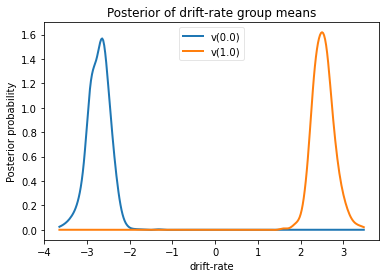

In [60]:
v1, v2= model2.nodes_db.node[['v(0.0)', 'v(1.0)']]
hddm.analyze.plot_posterior_nodes([v1, v2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

Text(0.5, 1.0, 'Posterior of drift-rate group means')

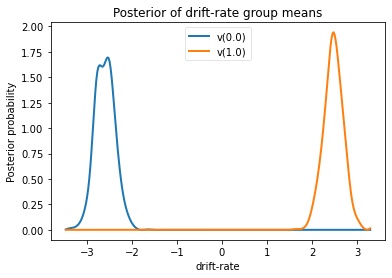

In [61]:
v1, v2= model3.nodes_db.node[['v(0.0)', 'v(1.0)']]
hddm.analyze.plot_posterior_nodes([v1, v2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

Text(0.5, 1.0, 'Posterior of drift-rate group means')

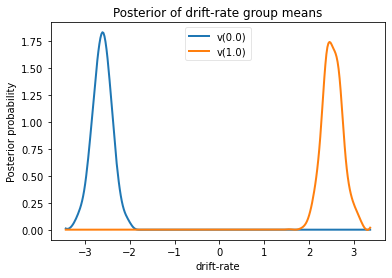

In [62]:
v1, v2= model4.nodes_db.node[['v(0.0)', 'v(1.0)']]
hddm.analyze.plot_posterior_nodes([v1, v2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

## 模型参数

In [20]:
models_1_comb = model1

In [21]:
models_2_comb = model2


In [22]:
models_3_comb = model3


In [23]:
models_4_comb = model4

In [24]:
params_fitted = models_1_comb
res = pd.concat((pd.DataFrame([params_fitted.values]), 
                 pd.DataFrame([params_fitted.dic], columns={'dic'})), axis=1)
res.to_csv('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model1_comb.csv')

In [25]:
params_fitted = models_2_comb
res = pd.concat((pd.DataFrame([params_fitted.values]), 
                 pd.DataFrame([params_fitted.dic], columns={'dic'})), axis=1)
res.to_csv('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model2_comb.csv')

In [26]:
params_fitted = models_3_comb
res = pd.concat((pd.DataFrame([params_fitted.values]), 
                 pd.DataFrame([params_fitted.dic], columns={'dic'})), axis=1)
res.to_csv('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model3_comb.csv')

In [27]:
params_fitted = models_4_comb
res = pd.concat((pd.DataFrame([params_fitted.values]), 
                 pd.DataFrame([params_fitted.dic], columns={'dic'})), axis=1)
res.to_csv('/home/jovyan/hddm/2_Study/2_4_Analysis/2_4_3_tmp_data/model/model4_comb.csv')

In [138]:
models_1_comb.get_traces()

a     a_std  a_subj.1.0  a_subj.3.0  a_subj.4.0  a_subj.5.0  \
0      1.312493  0.172195    1.389359    1.396684    1.249425    1.531301   
1      1.406329  0.174529    1.488587    1.395480    1.276607    1.557963   
2      1.416856  0.147376    1.389155    1.426895    1.258131    1.559385   
3      1.419267  0.203558    1.312805    1.398197    1.258226    1.518179   
4      1.378701  0.214627    1.310754    1.425170    1.215837    1.567999   
...         ...       ...         ...         ...         ...         ...   
15995  1.394335  0.100591    1.435167    1.332717    1.251303    1.476213   
15996  1.387411  0.174149    1.337088    1.436661    1.251306    1.451343   
15997  1.346918  0.118095    1.352321    1.385770    1.256885    1.445845   
15998  1.407071  0.134826    1.350084    1.452157    1.284744    1.423124   
15999  1.389043  0.145009    1.347356    1.473627    1.297877    1.345644   

       a_subj.6.0  a_subj.8.0  a_subj.9.0  a_subj.10.0  ...  z_subj_trans.6.0  \
0        1.782906    1.292091    1.486233     1.087994  ...          0.168564   
1        1.842876    1.281517    1.546444     1.120103  ...          0.138419   
2        1.763632    1.374335    1.674886     1.086570  ...          0.235975   
3        1.620361    1.359403    1.662645     1.084132  ...          0.141489   
4        1.671585    1.284906    1.647794     1.114256  ...          0.201871   
...           ...         ...         ...          ...  ...               ...   
15995    1.605076    1.332391    1.520876     1.177092  ...          0.261112   
15996    1.678059    1.332220    1.502224     1.139256  ...          0.210073   
15997    1.523865    1.239492    1.527068     1.132864  ...          0.227135   
15998    1.533696    1.285019    1.485144     1.095041  ...          0.328004   
15999    1.588010    1.221608    1.520655     1.099050  ...          0.246306   

       z_subj_trans.8.0  z_subj_trans.9.0  z_subj_trans.10.0  \
0              0.165181          0.169477           0.254488   
1              0.047460          0.092247           0.183290   
2              0.147660          0.059149           0.150414   
3              0.103858          0.083347          -0.025560   
4              0.101753          0.064371           0.188593   
...                 ...               ...                ...   
15995          0.084040          0.164093           0.126258   
15996          0.069881          0.287391           0.100477   
15997         -0.084697          0.109527          -0.071687   
15998         -0.090343          0.034925          -0.066809   
15999          0.078230          0.249984           0.123242   

       z_subj_trans.12.0  z_subj_trans.13.0  z_subj_trans.14.0  \
0               0.088923           0.144666           0.181138   
1               0.069093           0.022872           0.235548   
2               0.066544           0.075811           0.103867   
3               0.020807           0.076502           0.170854   
4               0.095137           0.058298           0.208783   
...                  ...                ...                ...   
15995          -0.026915           0.009355           0.145167   
15996          -0.038790           0.086266           0.018382   
15997           0.024341           0.015366           0.373651   
15998           0.003496          -0.021092           0.182437   
15999           0.013652           0.121797           0.059660   

       z_subj_trans.15.0  z_subj_trans.16.0  z_subj_trans.17.0  
0               0.002715           0.123958           0.112168  
1              -0.022597           0.160683           0.103376  
2               0.008543           0.267791           0.120079  
3              -0.043751           0.250531           0.101059  
4               0.028556           0.215890           0.159206  
...                  ...                ...                ...  
15995          -0.116831           0.173885          -0.077923  
15996          -0.140172          

In [137]:
models_2_comb.get_traces()

a     a_std  a_subj.1.0  a_subj.3.0  a_subj.4.0  a_subj.5.0  \
0      1.305134  0.214567    1.469363    1.299414    1.277028    1.450058   
1      1.380765  0.211659    1.450926    1.295474    1.206541    1.438532   
2      1.316862  0.199110    1.316716    1.226277    1.216167    1.440282   
3      1.313158  0.160269    1.343583    1.241247    1.203257    1.430234   
4      1.297209  0.176624    1.333350    1.241580    1.283511    1.394405   
...         ...       ...         ...         ...         ...         ...   
15995  1.307391  0.139566    1.307094    1.291835    1.189451    1.414530   
15996  1.318362  0.142074    1.297470    1.269092    1.232370    1.308269   
15997  1.316150  0.207367    1.267716    1.253855    1.204433    1.324885   
15998  1.374263  0.114456    1.261106    1.302798    1.228409    1.392511   
15999  1.354163  0.169240    1.216969    1.303348    1.240765    1.373475   

       a_subj.6.0  a_subj.8.0  a_subj.9.0  a_subj.10.0  ...  \
0        1.641355    1.263338    1.477491     1.012793  ...   
1        1.614007    1.284873    1.465488     1.015926  ...   
2        1.581417    1.396653    1.542327     1.060199  ...   
3        1.642785    1.380876    1.581503     1.100226  ...   
4        1.623400    1.267321    1.604588     1.116351  ...   
...           ...         ...         ...          ...  ...   
15995    1.561547    1.254706    1.547092     1.113363  ...   
15996    1.600752    1.252113    1.495780     1.063106  ...   
15997    1.577255    1.264274    1.611734     1.142523  ...   
15998    1.564251    1.176602    1.656697     1.112654  ...   
15999    1.518769    1.192103    1.596585     1.063902  ...   

       z_subj_trans(Low).6.0  z_subj_trans(Low).8.0  z_subj_trans(Low).9.0  \
0                   0.199756               0.168035               0.084683   
1                  -0.176010               0.092185               0.061551   
2                  -0.042769               0.048263               0.100771   
3                  -0.007286               0.123997              -0.028831   
4                  -0.036431               0.141312               0.026709   
...                      ...                    ...                    ...   
15995               0.017960               0.054930              -0.009069   
15996               0.033051               0.108155               0.094823   
15997               0.020933               0.167140               0.185303   
15998               0.102356               0.193003               0.167266   
15999               0.133609               0.118501               0.043062   

       z_subj_trans(Low).10.0  z_subj_trans(Low).12.0  z_subj_trans(Low).13.0  \
0                    0.023194               -0.164789                0.096219   
1                    0.195576                0.033902                0.075364   
2                   -0.043162               -0.084925               -0.091680   
3                   -0.055355                0.008533               -0.050376   
4                    0.017772               -0.094574               -0.097839   
...                       ...                     ...                     ...   
15995                0.186138               -0.146186                0.038673   
15996                0.205393                0.029665                0.005212   
15997                0.057228               -0.279259               -0.040336   
15998                0.098910               -0.085143               -0.008171   
15999                0.031203               -0.054855                0.116841   

       z_subj_trans(Low).14.0  z_subj_trans(Low).15.0  z_subj_trans(Low).16.0  \
0                    0.173583                0.118523                0.105421   
1                    0.113565                0.118399               -0.074970   
2                    0.091901                0.102319                0.100420   
3                    0.114247               -0.152428                0.085403   
4                

In [126]:
models_3_comb.get_traces()

a(High)    a(Low)     a_std  a_subj(High).1.0  a_subj(High).3.0  \
0      1.168396  1.454694  0.185680          1.215696          1.246446   
1      1.216044  1.414680  0.130129          1.209077          1.231852   
2      1.183727  1.426604  0.134991          1.227472          1.253771   
3      1.207775  1.415548  0.133488          1.203361          1.237782   
4      1.255185  1.514730  0.138595          1.372576          1.150103   
...         ...       ...       ...               ...               ...   
15995  1.495131  1.686450  0.513721          2.320641          1.221855   
15996  1.534473  1.849025  0.493395          2.225249          1.134988   
15997  1.453100  1.770142  0.477996          2.306552          1.144318   
15998  1.447167  1.858137  0.452952          2.224821          1.128820   
15999  1.754158  1.923493  0.664881          2.135766          1.081414   

       a_subj(High).4.0  a_subj(High).5.0  a_subj(High).6.0  a_subj(High).8.0  \
0              1.143668          1.309183          1.433046          1.252320   
1              1.057812          1.299703          1.460560          1.223405   
2              1.041072          1.353509          1.213019          1.203103   
3              1.148229          1.334883          1.398976          1.231133   
4              1.175241          1.404211          1.390954          1.224739   
...                 ...               ...               ...               ...   
15995          1.142111          2.795044          1.359405          1.264821   
15996          1.057409          2.610378          1.421461          1.203784   
15997          1.122160          2.537228          1.475861          1.181176   
15998          1.029436          2.746125          1.435043          1.228522   
15999          1.088253          2.619578          1.563650          1.178761   

       a_subj(High).9.0  ...  z_subj_trans.6.0  z_subj_trans.8.0  \
0              1.268845  ...          0.192871          0.058604   
1              1.480962  ...          0.126635         -0.052764   
2              1.425121  ...          0.194149         -0.031647   
3              1.354139  ...          0.195801          0.004425   
4              1.314256  ...          0.267918          0.046308   
...                 ...  ...               ...               ...   
15995          1.549866  ...          0.096222          0.010213   
15996          1.682355  ...          0.226696          0.107812   
15997          1.942236  ...          0.080455          0.155510   
15998          1.754458  ...          0.185185          0.135185   
15999          1.636426  ...          0.281679          0.179906   

       z_subj_trans.9.0  z_subj_trans.10.0  z_subj_trans.12.0  \
0             -0.011492           0.119832           0.038474   
1              0.083511           0.058963           0.078872   
2              0.086712           0.126200          -0.121113   
3              0.162550           0.095539          -0.088511   
4              0.180190           0.178641           0.106286   
...                 ...                ...                ...   
15995          0.225442           0.269680          -0.045457   
15996          0.210000           0.323761           0.054161   
15997          0.266549           0.314535          -0.116638   
15998          0.209160           0.157682          -0.123475   
15999          0.171439           0.129707          -0.097057   

       z_subj_trans.13.0  z_subj_trans.14.0  z_subj_trans.15.0  \
0               0.007357           0.092857           0.047662   
1               0.037890           0.123577           0.084647   
2               0.074444           0.153659           0.076372   
3               0.064748           0.158734           0.066578   
4               0.052202           0.237554          -0.010314   
...                  ...                ...                ...   
15995           0.057522           0.268622          -0.175996   
15996   

In [127]:
models_4_comb.get_traces()

a     a_std  a_subj.1.0  a_subj.3.0  a_subj.4.0  a_subj.5.0  \
0      1.282579  0.252544    1.245447    1.344784    1.121305    1.352873   
1      1.383357  0.139524    1.271966    1.311311    1.134450    1.365045   
2      1.331882  0.181255    1.195015    1.293503    1.118065    1.358537   
3      1.208436  0.149413    1.261752    1.313994    1.179432    1.393777   
4      1.306133  0.135154    1.262975    1.258443    1.160440    1.397791   
...         ...       ...         ...         ...         ...         ...   
15995  1.242848  0.245724    1.386304    1.349238    1.113381    1.220112   
15996  1.404442  0.184213    1.402166    1.282298    1.255811    1.225432   
15997  1.439221  0.198717    1.372432    1.261239    1.195046    1.224981   
15998  1.227331  0.183878    1.353118    1.249740    1.142591    1.326424   
15999  1.315906  0.110635    1.330708    1.212530    1.162884    1.222261   

       a_subj.6.0  a_subj.8.0  a_subj.9.0  a_subj.10.0  ...  z_subj_trans.6.0  \
0        1.674305    1.322127    1.380015     1.037082  ...          0.164597   
1        1.646061    1.303435    1.377526     1.022715  ...          0.104042   
2        1.654722    1.253768    1.479355     1.039081  ...          0.177985   
3        1.614854    1.253429    1.388458     1.074658  ...          0.202119   
4        1.614183    1.298716    1.499002     1.028209  ...          0.217585   
...           ...         ...         ...          ...  ...               ...   
15995    1.566639    1.257677    1.395018     1.068092  ...          0.152099   
15996    1.559933    1.294405    1.348916     1.079406  ...          0.049440   
15997    1.509691    1.274740    1.372654     1.065102  ...          0.072133   
15998    1.424209    1.300700    1.365817     1.114405  ...          0.060824   
15999    1.529411    1.366558    1.480230     1.094153  ...          0.107949   

       z_subj_trans.8.0  z_subj_trans.9.0  z_subj_trans.10.0  \
0              0.032707          0.144376           0.264287   
1             -0.036000          0.190186           0.137585   
2             -0.071844          0.067531           0.152628   
3              0.095067          0.088905           0.152525   
4              0.128187          0.046699           0.356151   
...                 ...               ...                ...   
15995         -0.051604          0.078276           0.235822   
15996         -0.048877          0.082552           0.160752   
15997         -0.017702          0.030546           0.239083   
15998          0.012383          0.091407           0.215762   
15999          0.110291          0.185042           0.178303   

       z_subj_trans.12.0  z_subj_trans.13.0  z_subj_trans.14.0  \
0              -0.174735           0.001555           0.191468   
1              -0.188558           0.145304           0.058037   
2              -0.162829           0.102655           0.112412   
3              -0.138108           0.139936           0.129990   
4              -0.095055           0.206935           0.140316   
...                  ...                ...                ...   
15995          -0.047936          -0.015475           0.136786   
15996          -0.047253           0.059057           0.187695   
15997          -0.081855           0.083476           0.162230   
15998          -0.013144           0.072836           0.161267   
15999          -0.004726           0.139153           0.038588   

       z_subj_trans.15.0  z_subj_trans.16.0  z_subj_trans.17.0  
0              -0.006155           0.188324           0.189045  
1              -0.004414           0.188241           0.141651  
2              -0.157020           0.188869           0.062771  
3              -0.131017           0.165867          -0.028472  
4              -0.169820           0.081001          -0.063709  
...                  ...                ...                ...  
15995           0.012881           0.105613          -0.115139  
15996          -0.042236          

In [128]:
models_1_comb.dic

-2862.3305071875357

In [121]:
models_2_comb.dic

-2537.178794779408

In [122]:
models_3_comb.dic

-2589.224341555489

In [123]:
models_4_comb.dic

-2710.6212330798844